# Tutorial 2: How to perform AA test

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from hypex.ab_test import AATest
from hypex.utils.tutorial_data_creation import create_test_data

pd.options.display.float_format = '{:,.2f}'.format

np.random.seed(52) # needed to create example data

In [2]:
def show_result(result):
    for k, v in result.items():
        print(k)
        display(v)
        print()

## 1. Create or upload your dataset
In this case we will create random dataset with known effect size  
If you have your own dataset, go to the part 2 

In [3]:
data = create_test_data(rs=52, na_step=10, nan_cols=['age', 'gender'])
data

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry
0,0,0,0,488.00,414.44,NaN,M,E-commerce
1,3,0,0,501.50,424.33,31.00,NaN,Logistics
2,10,0,0,522.50,416.22,64.00,M,E-commerce
3,12,0,0,472.00,423.78,43.00,M,E-commerce
4,13,0,0,508.50,424.22,36.00,F,E-commerce
...,...,...,...,...,...,...,...,...
5365,9991,0,0,482.50,421.89,23.00,F,E-commerce
5366,9992,0,0,491.50,424.00,44.00,M,E-commerce
5367,9994,0,0,486.00,423.78,27.00,F,Logistics
5368,9996,0,0,500.50,430.89,56.00,F,E-commerce


## 2. AATest

### 2.0 Initialize parameters
`info_col` used to define informative attributes that should NOT be part of testing, such as user_id and signup_month <br>

In [3]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

### 2.1 Simple AA-test
This is the easiest way to initialize and calculate metrics on a AA-test (default - on 10 iterations)<br>
Use it when you are clear about each attribute or if you don't have any additional task conditions (like grouping)

In [4]:
experiment = AATest( info_cols=info_cols, target_fields=target)

  0%|          | 0/10 [00:00<?, ?it/s]

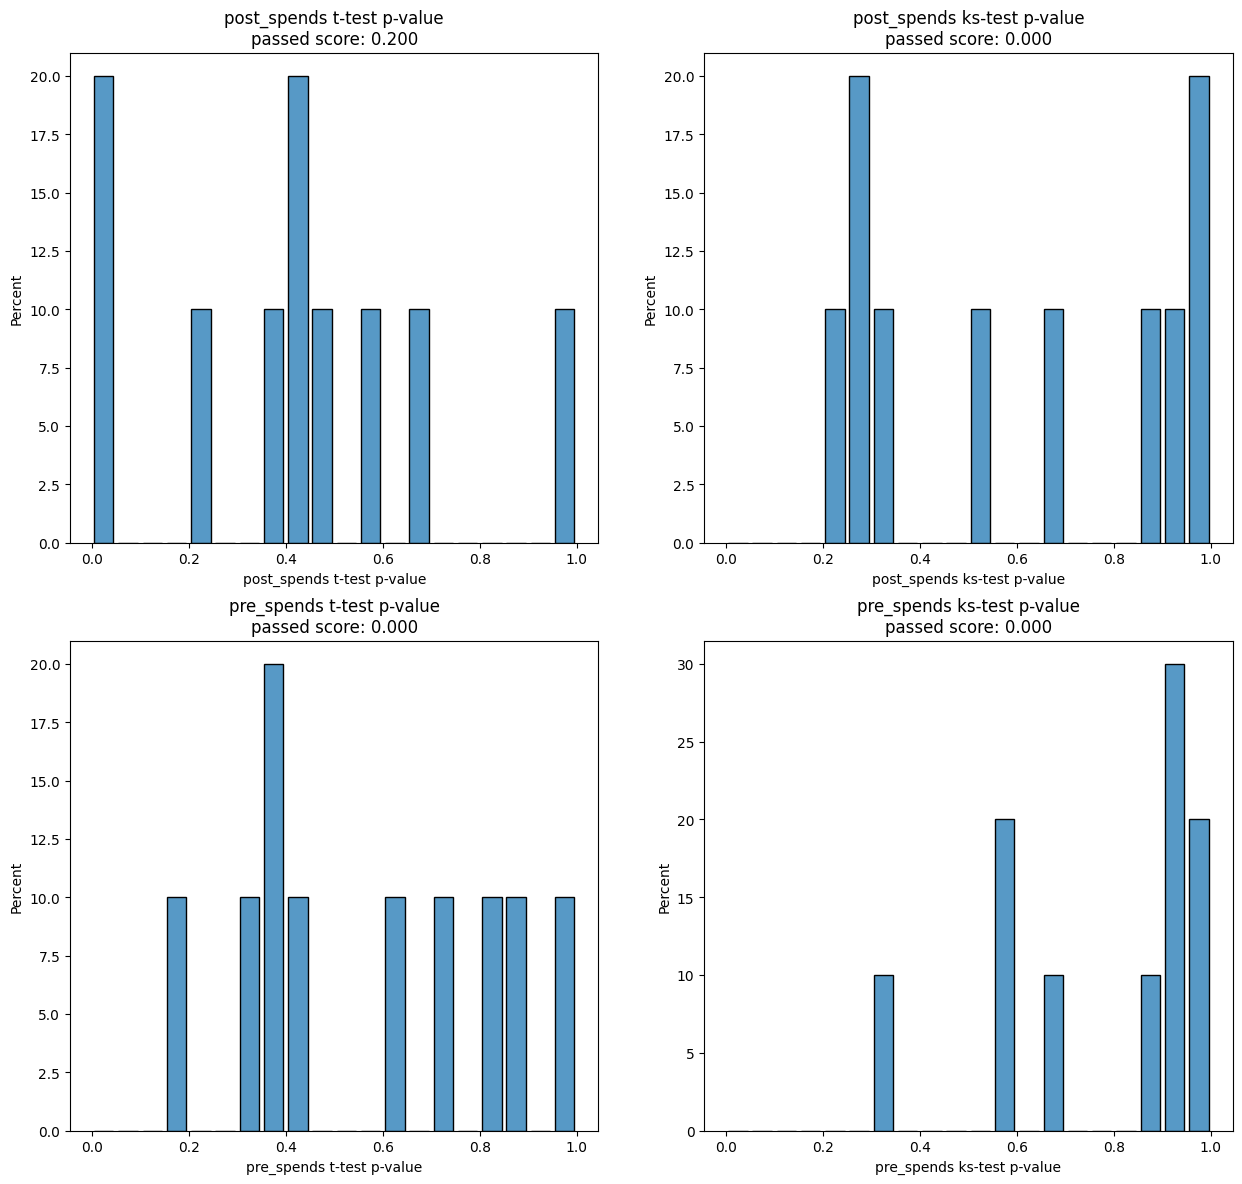

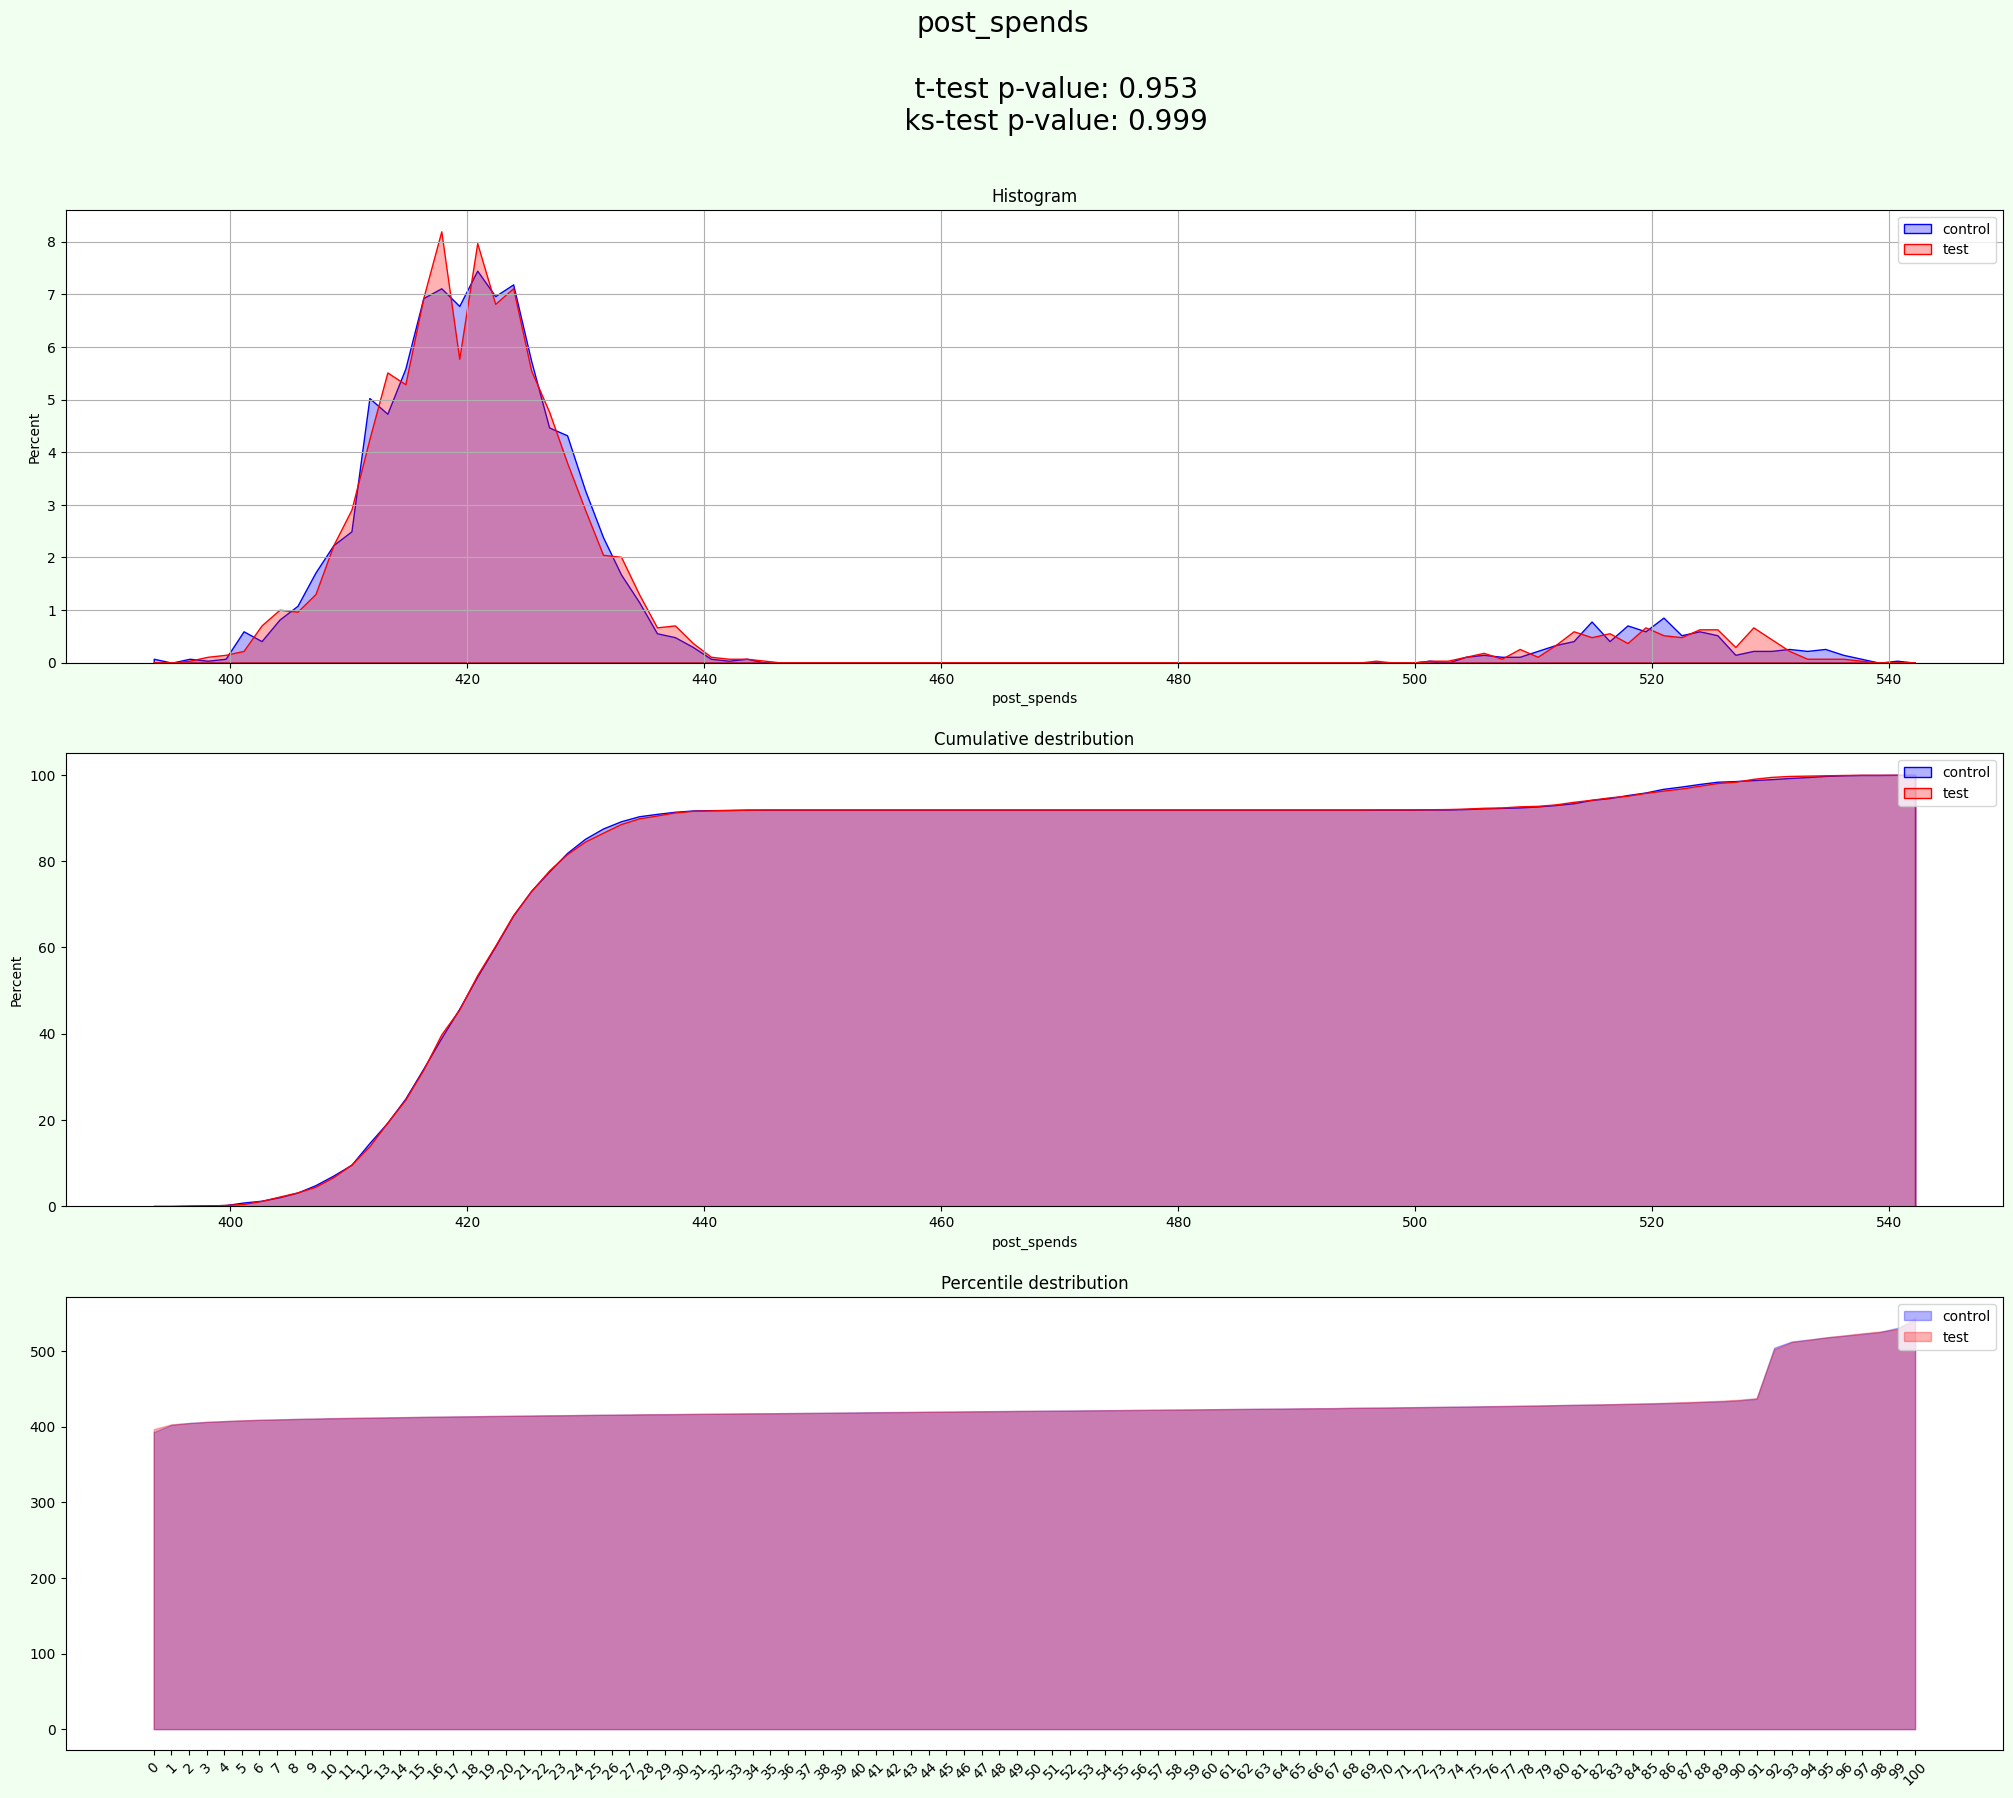

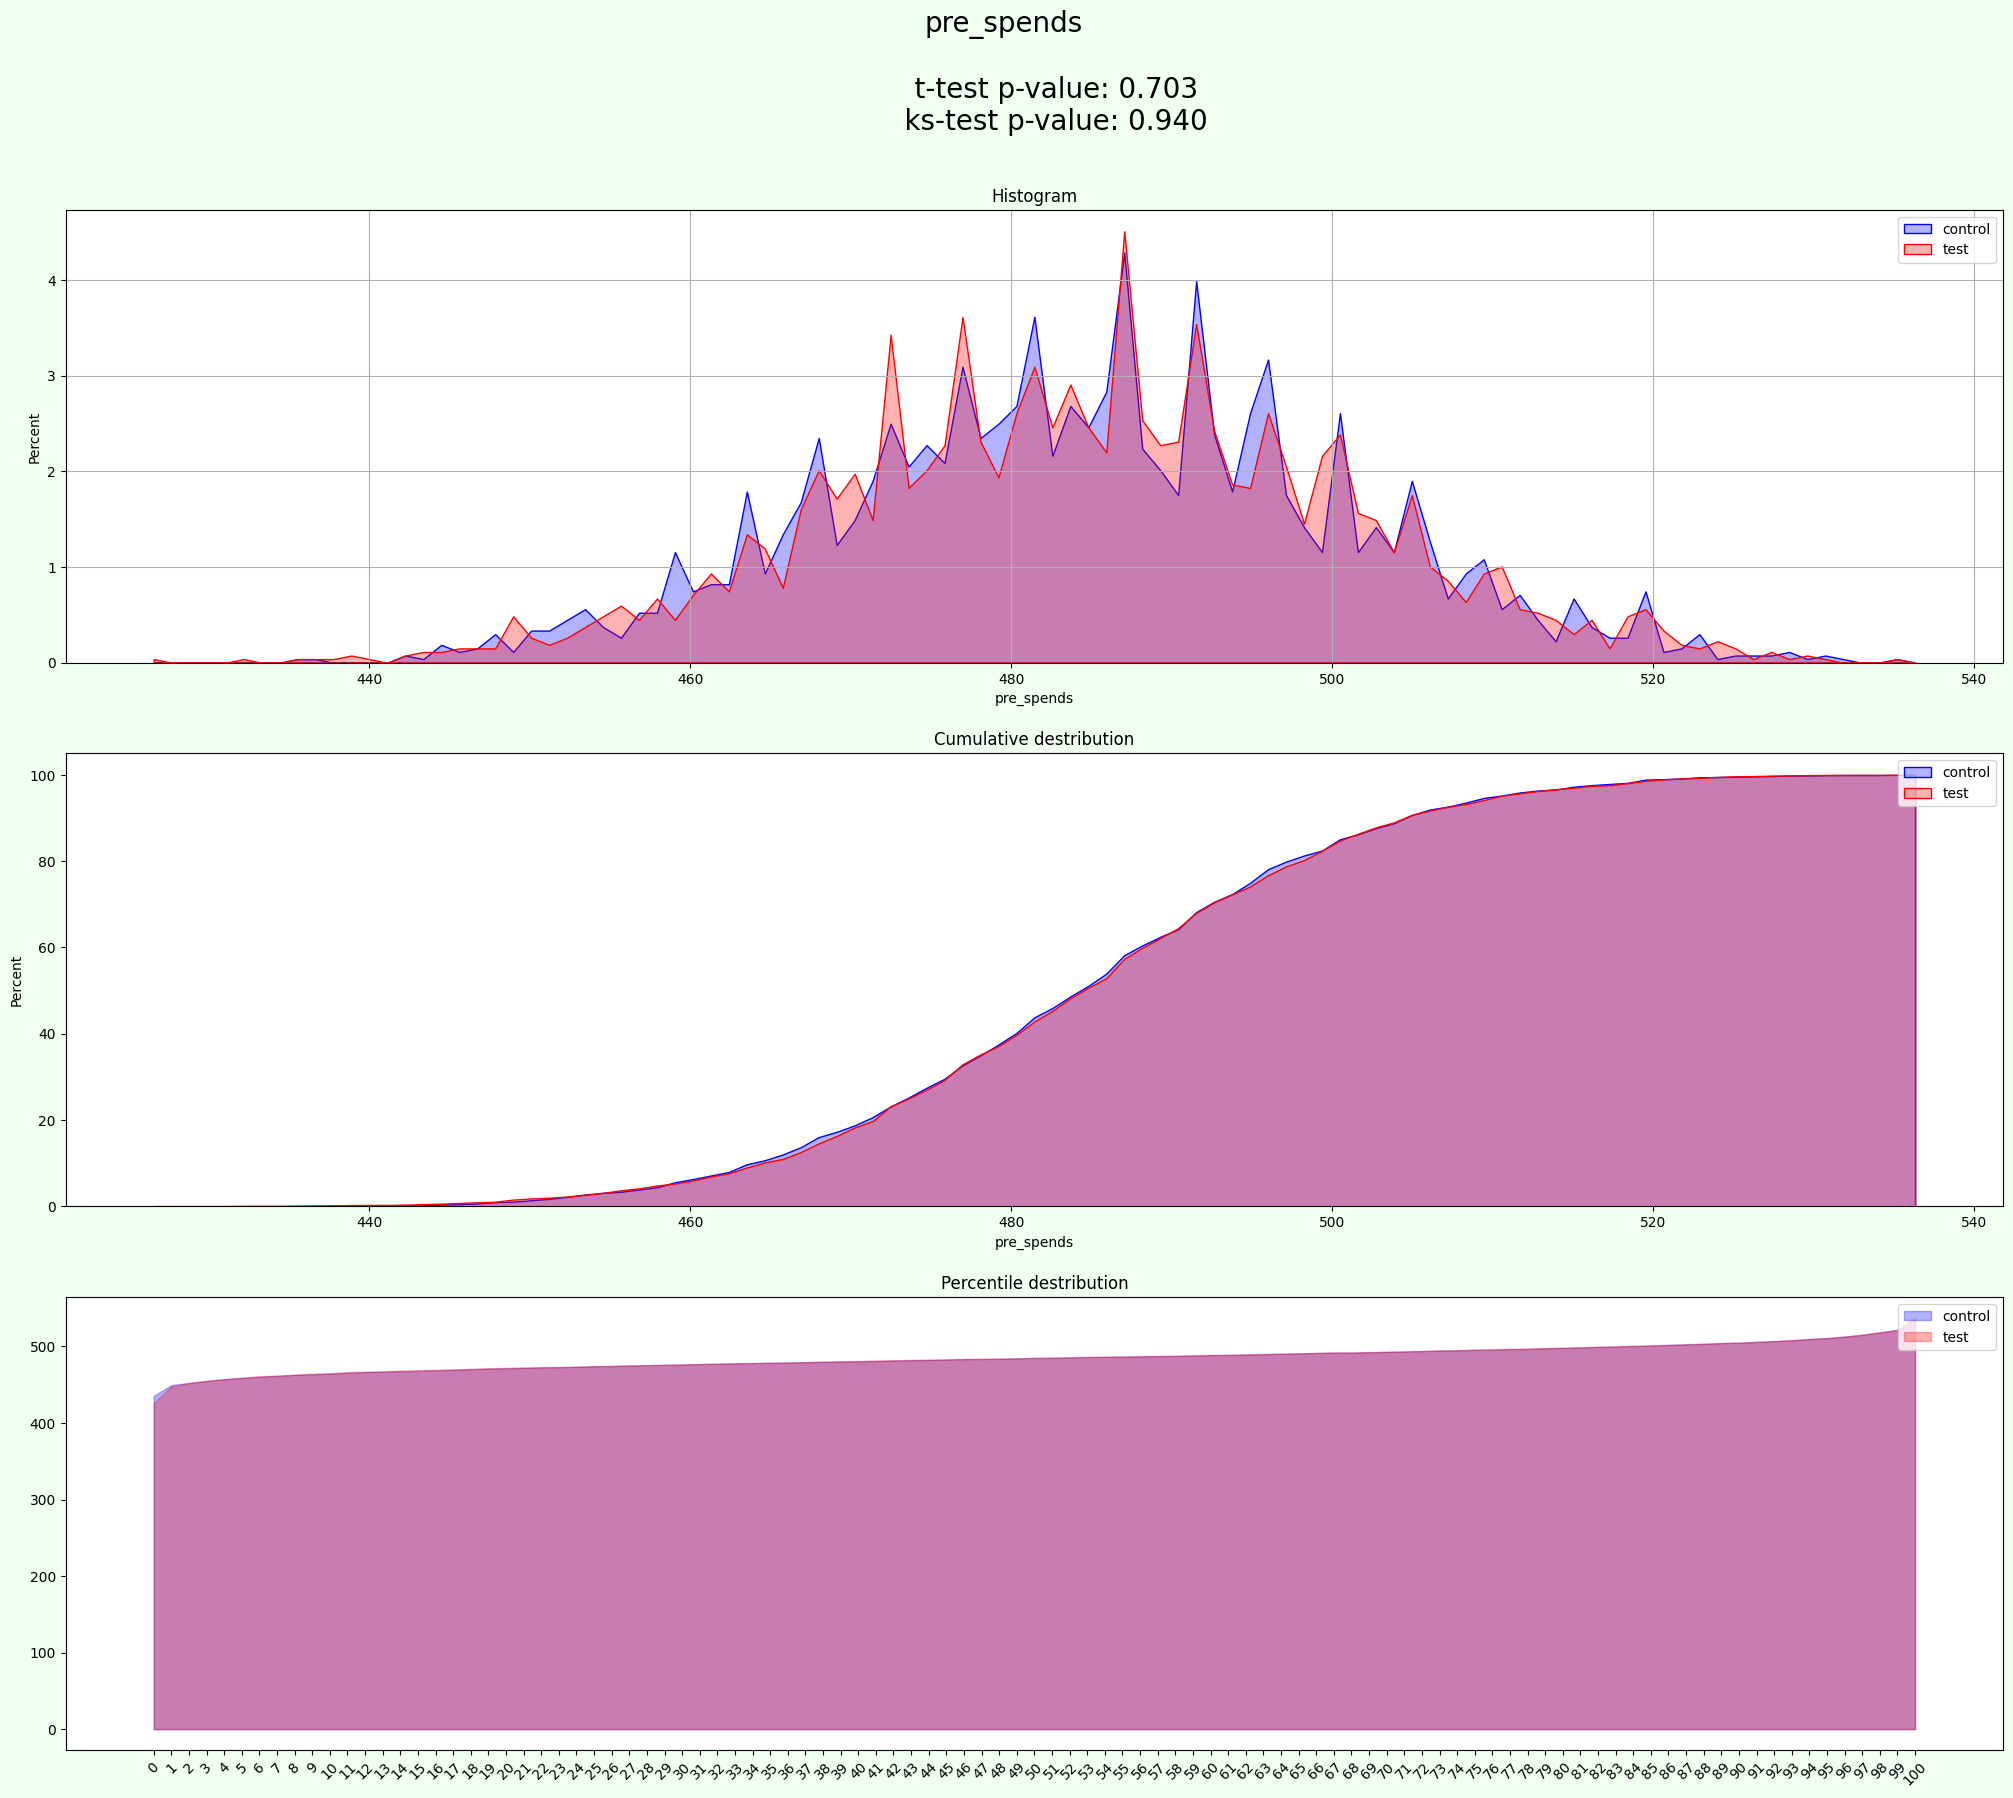

dict_keys(['experiments', 'aa_score', 'split', 'best_experiment_stat', 'split_stat', 'resume'])

In [5]:
result = experiment.process(data, iterations=10)
result.keys()

In [6]:
result['aa_score']

,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.20,0.00,0.00,0.00
pre_spends,0.00,0.00,0.00,0.00
mean,0.10,0.00,0.00,0.00


In [7]:
result['best_experiment_stat']

,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.18,428.14,-0.05,-0.01,0.95,1.00,False,False
pre_spends,485.01,484.84,-0.16,-0.03,0.70,0.94,False,False


In [8]:
experiment.get_resume(result['aa_score'], result['best_experiment_stat'])

,aa test passed,split is uniform
post_spends,not OK,OK
pre_spends,not OK,OK


`experiment_result` is a table of results of experiments, which includes 
- means of all targets in a and b samples, 
- p_values of Student t-test and test Kolmogorova-Smirnova, 
- and results of tests (did data on the random_state passes the uniform test)

In [9]:
result["experiments"].sort_values("mean_tests_score")

,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
7,7,429.06,427.26,-1.80,-0.42,0.02,0.29,True,False,485.12,...,False,50.00,50.00,2685,2685,0.20,0.31,50.00,0.00,0.27
5,5,427.89,428.43,0.54,0.13,0.49,0.26,False,False,484.71,...,False,50.00,50.00,2685,2685,0.40,0.41,0.00,0.00,0.41
8,8,429.02,427.30,-1.73,-0.40,0.03,0.30,True,False,484.89,...,False,50.00,50.00,2685,2685,0.46,0.61,50.00,0.00,0.56
6,6,428.51,427.82,-0.69,-0.16,0.37,0.22,False,False,484.97,...,False,50.00,50.00,2685,2685,0.60,0.61,0.00,0.00,0.61
0,0,428.48,427.85,-0.63,-0.15,0.42,0.86,False,False,485.22,...,False,50.00,50.00,2685,2685,0.29,0.77,0.00,0.00,0.61
1,1,428.65,427.67,-0.98,-0.23,0.21,0.54,False,False,485.04,...,False,50.00,50.00,2685,2685,0.40,0.73,0.00,0.00,0.62
9,9,428.00,428.33,0.33,0.08,0.67,0.91,False,False,484.74,...,False,50.00,50.00,2685,2685,0.53,0.75,0.00,0.00,0.67
2,2,427.94,428.38,0.44,0.10,0.57,0.96,False,False,485.09,...,False,50.00,50.00,2685,2685,0.51,0.91,0.00,0.00,0.78
3,3,428.47,427.86,-0.61,-0.14,0.43,0.67,False,False,484.93,...,False,50.00,50.00,2685,2685,0.71,0.83,0.00,0.00,0.79
4,4,428.18,428.14,-0.05,-0.01,0.95,1.00,False,False,485.01,...,False,50.00,50.00,2685,2685,0.83,0.97,0.00,0.00,0.92


In [10]:
result['aa_score']

,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.20,0.00,0.00,0.00
pre_spends,0.00,0.00,0.00,0.00
mean,0.10,0.00,0.00,0.00


`dict_of_datas` is a dictionary with random_states as keys and dataframes as values.<br>
Result of separation can be find in column 'group', it contains values 'test' and 'control'

In [11]:
result["split"]

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,488.00,414.44,NaN,M,E-commerce,test
1,12,0,0,472.00,423.78,43.00,M,E-commerce,test
2,14,0,0,497.00,421.78,26.00,M,Logistics,test
3,15,0,0,464.50,421.67,38.00,F,E-commerce,test
4,16,0,0,498.00,413.33,65.00,M,Logistics,test
...,...,...,...,...,...,...,...,...,...
5365,9991,0,0,482.50,421.89,23.00,F,E-commerce,control
5366,9992,0,0,491.50,424.00,44.00,M,E-commerce,control
5367,9994,0,0,486.00,423.78,27.00,F,Logistics,control
5368,9996,0,0,500.50,430.89,56.00,F,E-commerce,control


In [12]:
result["best_experiment_stat"]

,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.18,428.14,-0.05,-0.01,0.95,1.00,False,False
pre_spends,485.01,484.84,-0.16,-0.03,0.70,0.94,False,False


In [13]:
result["split_stat"]

control %              50.00
test %                 50.00
control size            2685
test size               2685
t-test mean p-value     0.83
ks-test mean p-value    0.97
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.92
Name: 4, dtype: object

In [15]:
result["resume"]

,aa test passed,split is uniform
post_spends,not OK,OK
pre_spends,not OK,OK


### 2.2 Single experiment
To get stable results lets fix `random_state`

In [17]:
random_state = 11

To perform single experiment you can use `sampling_metrics()`

In [18]:
experiment = AATest(info_cols=info_cols, target_fields=target)
metrics, dict_of_datas = experiment.sampling_metrics(data=data, random_state=random_state).values()

The results contains the same info as in multisampling, but on one experiment

In [25]:
metrics

{'random_state': 11,
 'post_spends a mean': 428.5347817090834,
 'post_spends b mean': 427.7893234016139,
 'post_spends ab delta': -0.7454583074695051,
 'post_spends ab delta %': -0.17425827777606262,
 'post_spends t-test p-value': 0.33561550504114157,
 'post_spends ks-test p-value': 0.6263469727648824,
 'post_spends t-test passed': False,
 'post_spends ks-test passed': False,
 'pre_spends a mean': 484.8584729981378,
 'pre_spends b mean': 484.9912476722533,
 'pre_spends ab delta': 0.13277467411546695,
 'pre_spends ab delta %': 0.027376715508320437,
 'pre_spends t-test p-value': 0.7577698697749307,
 'pre_spends ks-test p-value': 0.762662388584242,
 'pre_spends t-test passed': False,
 'pre_spends ks-test passed': False,
 'control %': 50.0,
 'test %': 50.0,
 'control size': 2685,
 'test size': 2685,
 't-test mean p-value': 0.5466926874080361,
 'ks-test mean p-value': 0.6945046806745622,
 't-test passed %': 0.0,
 'ks-test passed %': 0.0,
 'mean_tests_score': 0.6452340162523869}

In [20]:
dict_of_datas[random_state]

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,488.00,414.44,NaN,M,E-commerce,test
1,10,0,0,522.50,416.22,64.00,M,E-commerce,test
2,12,0,0,472.00,423.78,43.00,M,E-commerce,test
3,13,0,0,508.50,424.22,36.00,F,E-commerce,test
4,15,0,0,464.50,421.67,38.00,F,E-commerce,test
...,...,...,...,...,...,...,...,...,...
5365,9988,0,0,501.50,423.22,55.00,F,Logistics,control
5366,9990,0,0,490.00,426.00,18.00,M,E-commerce,control
5367,9991,0,0,482.50,421.89,23.00,F,E-commerce,control
5368,9992,0,0,491.50,424.00,44.00,M,E-commerce,control


In [29]:
experiment_stat, split_stat = experiment.experiment_result_transform(pd.Series(metrics))

In [30]:
experiment_stat

,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.53,427.79,-0.75,-0.17,0.34,0.63,False,False
pre_spends,484.86,484.99,0.13,0.03,0.76,0.76,False,False


In [31]:
split_stat

control %              50.00
test %                 50.00
control size            2685
test size               2685
t-test mean p-value     0.55
ks-test mean p-value    0.69
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.65
dtype: object

### 2.3 AA-test with grouping

To perform experiment that separates samples by groups `group_col` can be used

In [32]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

group_cols = 'industry'

In [33]:
experiment = AATest(info_cols=info_cols, target_fields=target, group_cols=group_cols)

  0%|          | 0/19 [00:00<?, ?it/s]

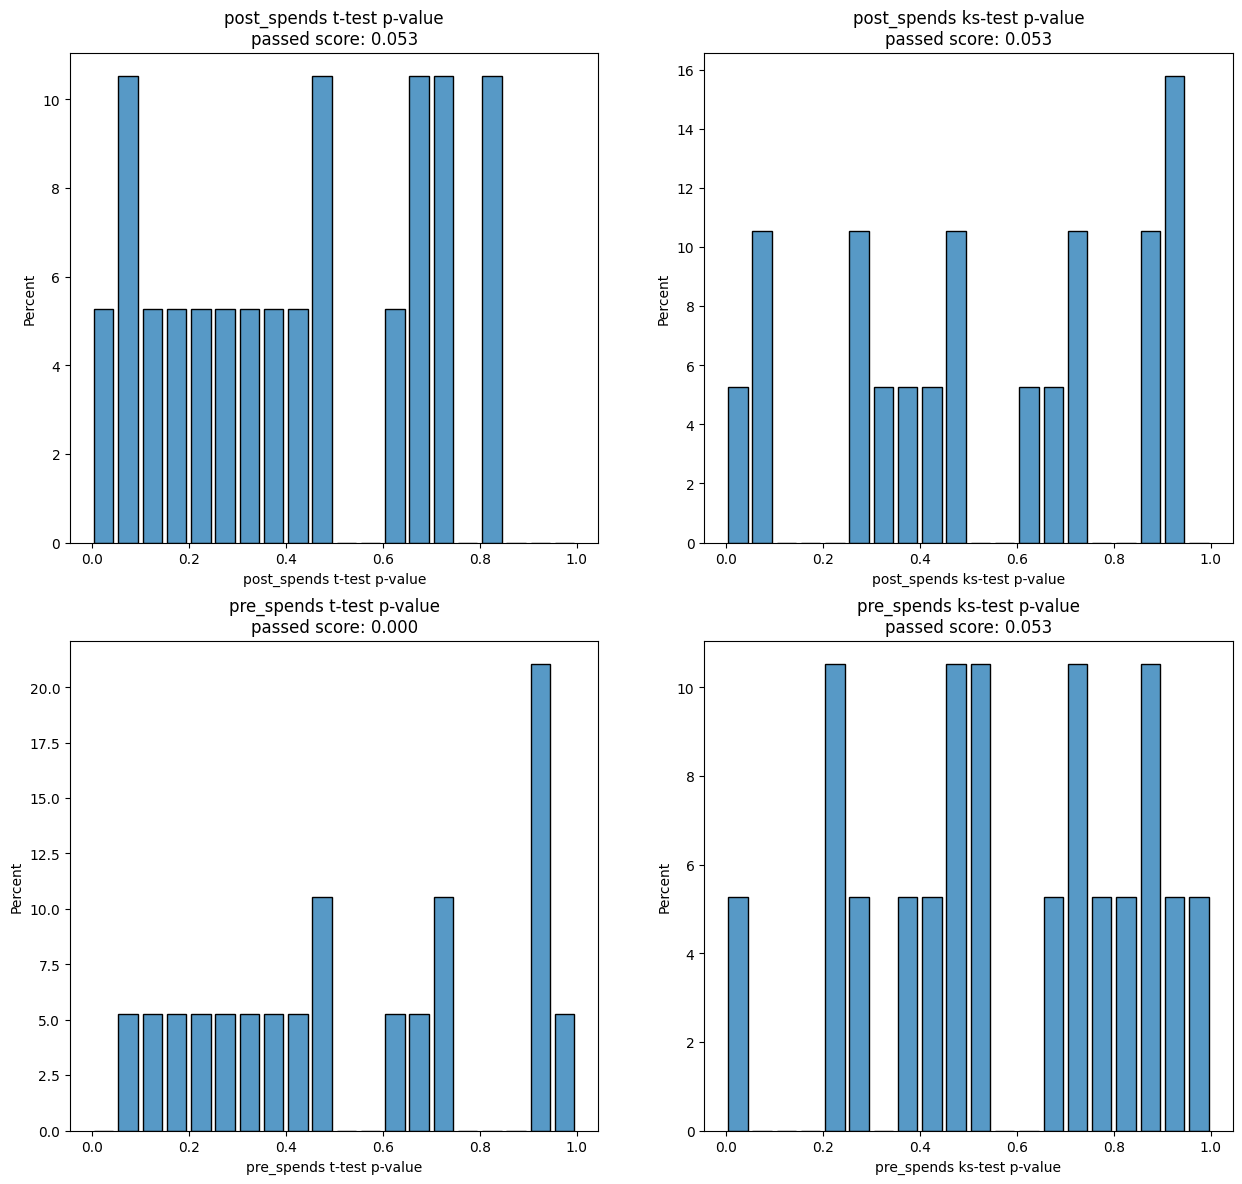

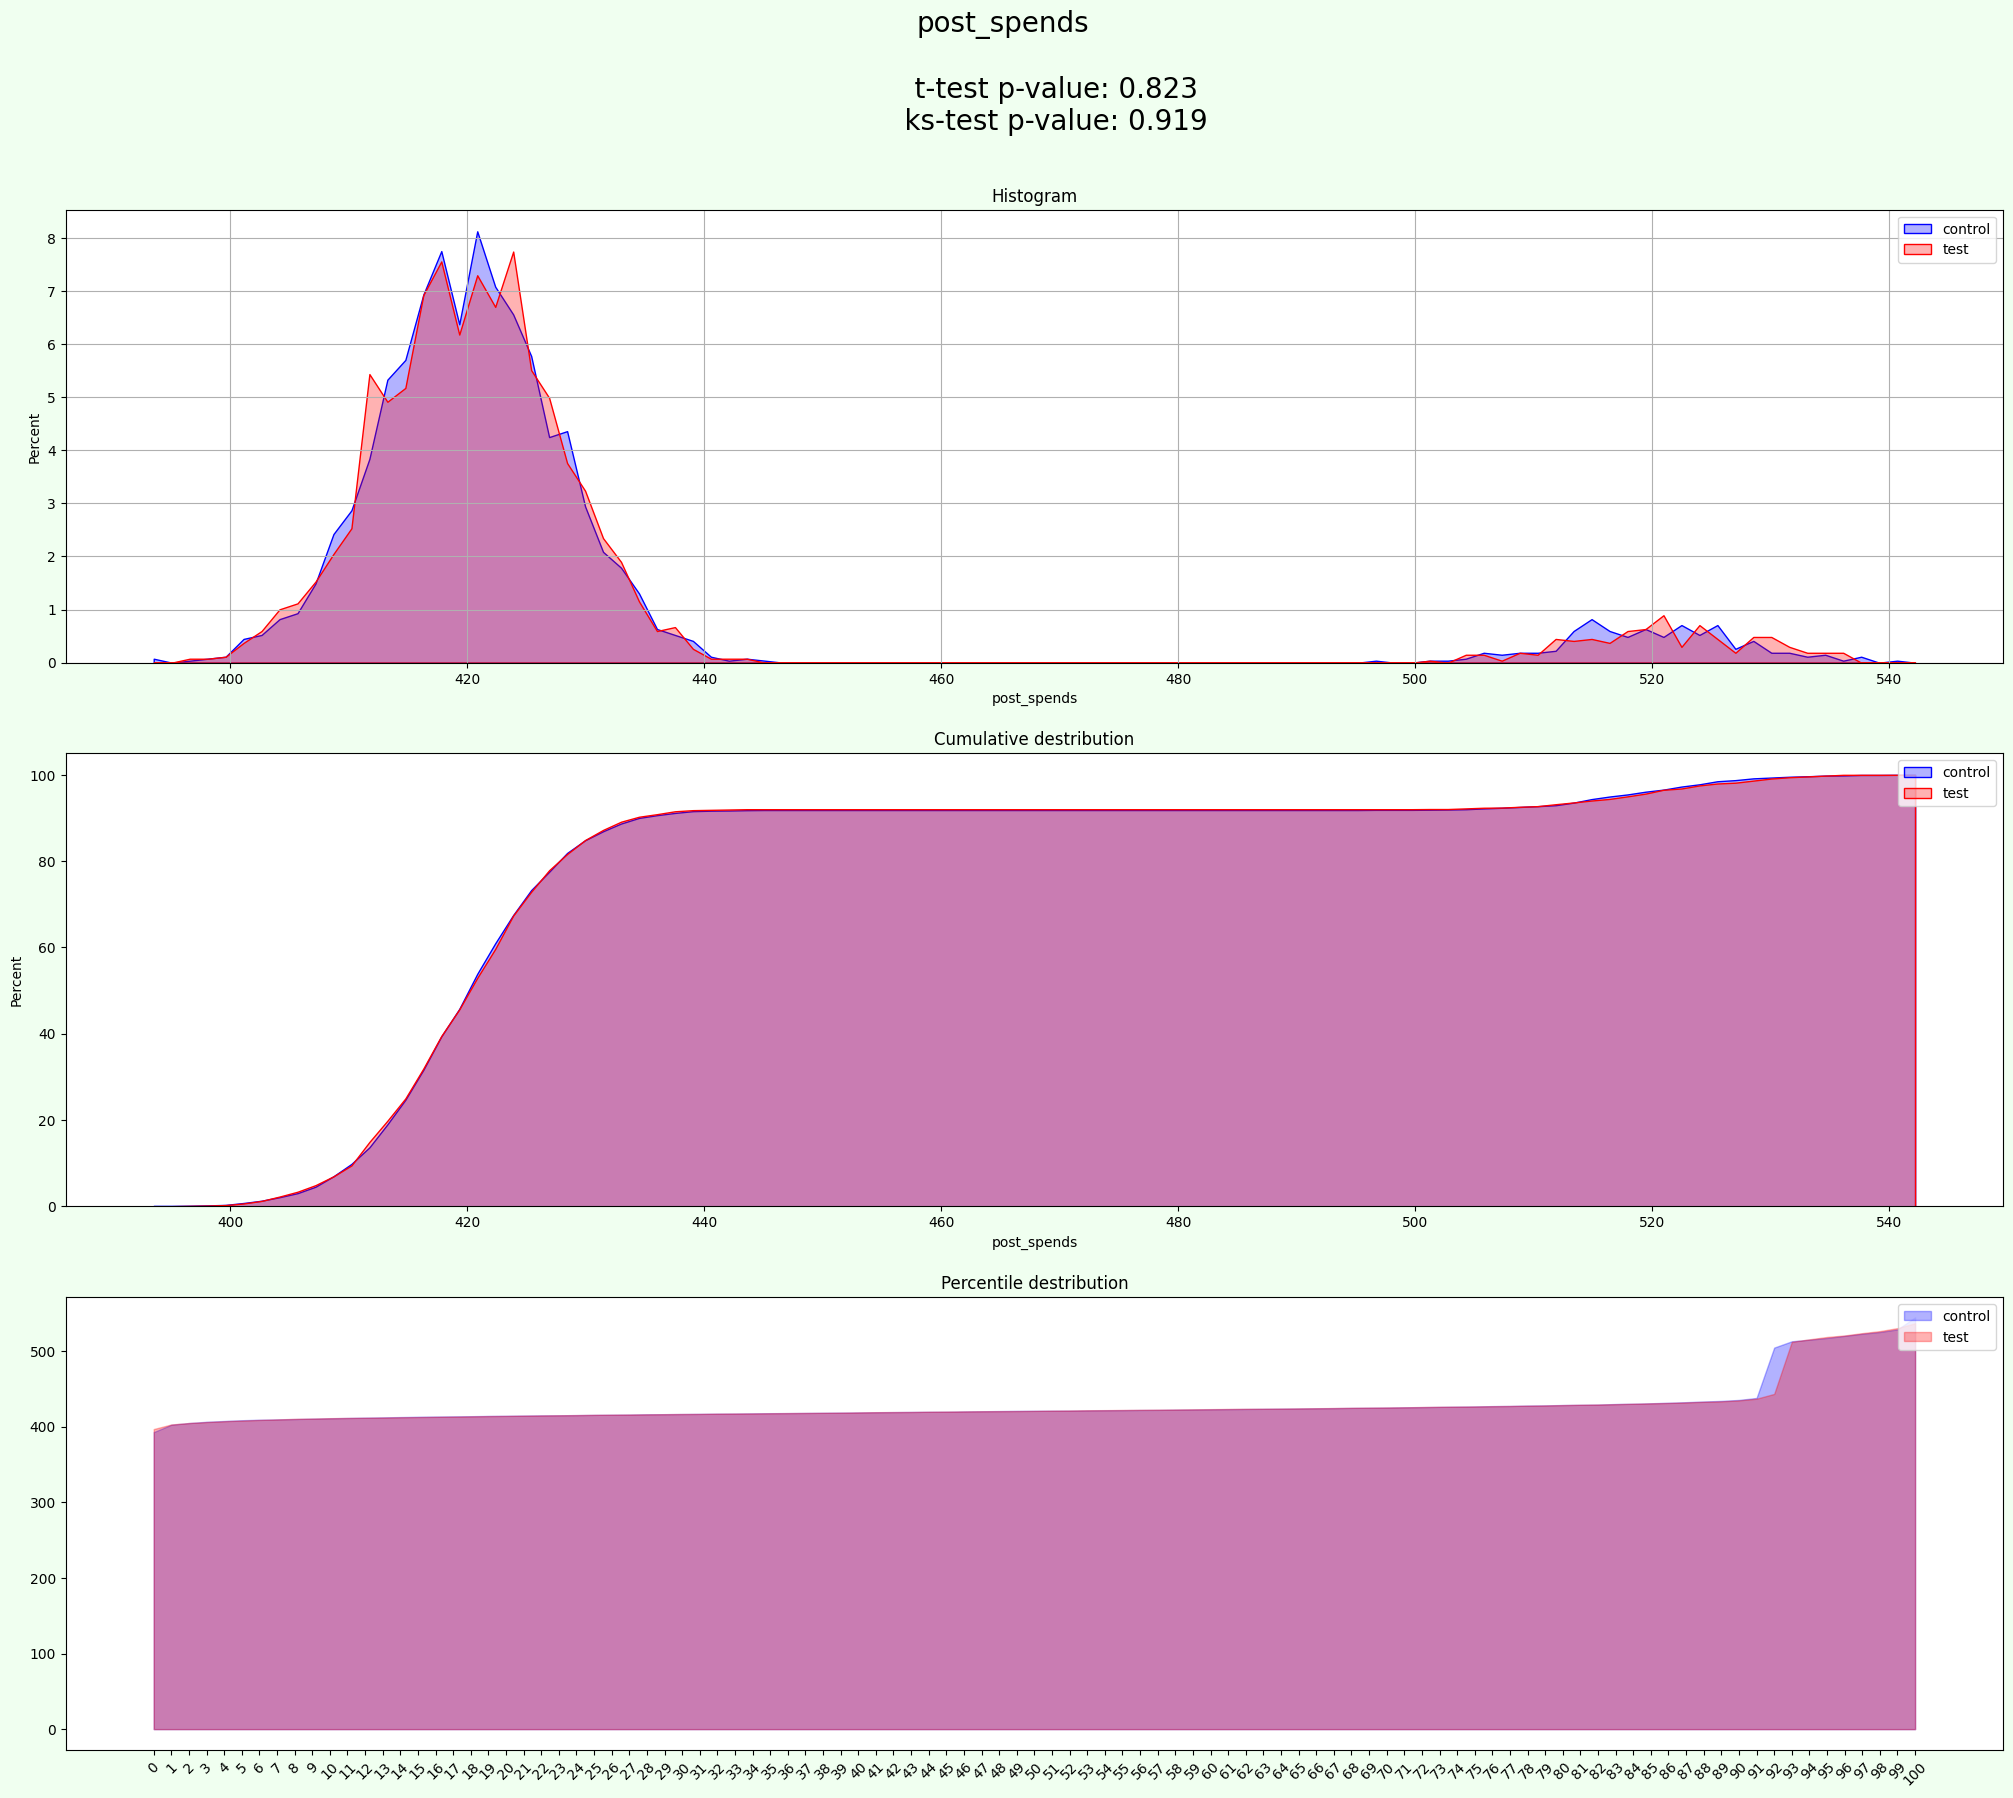

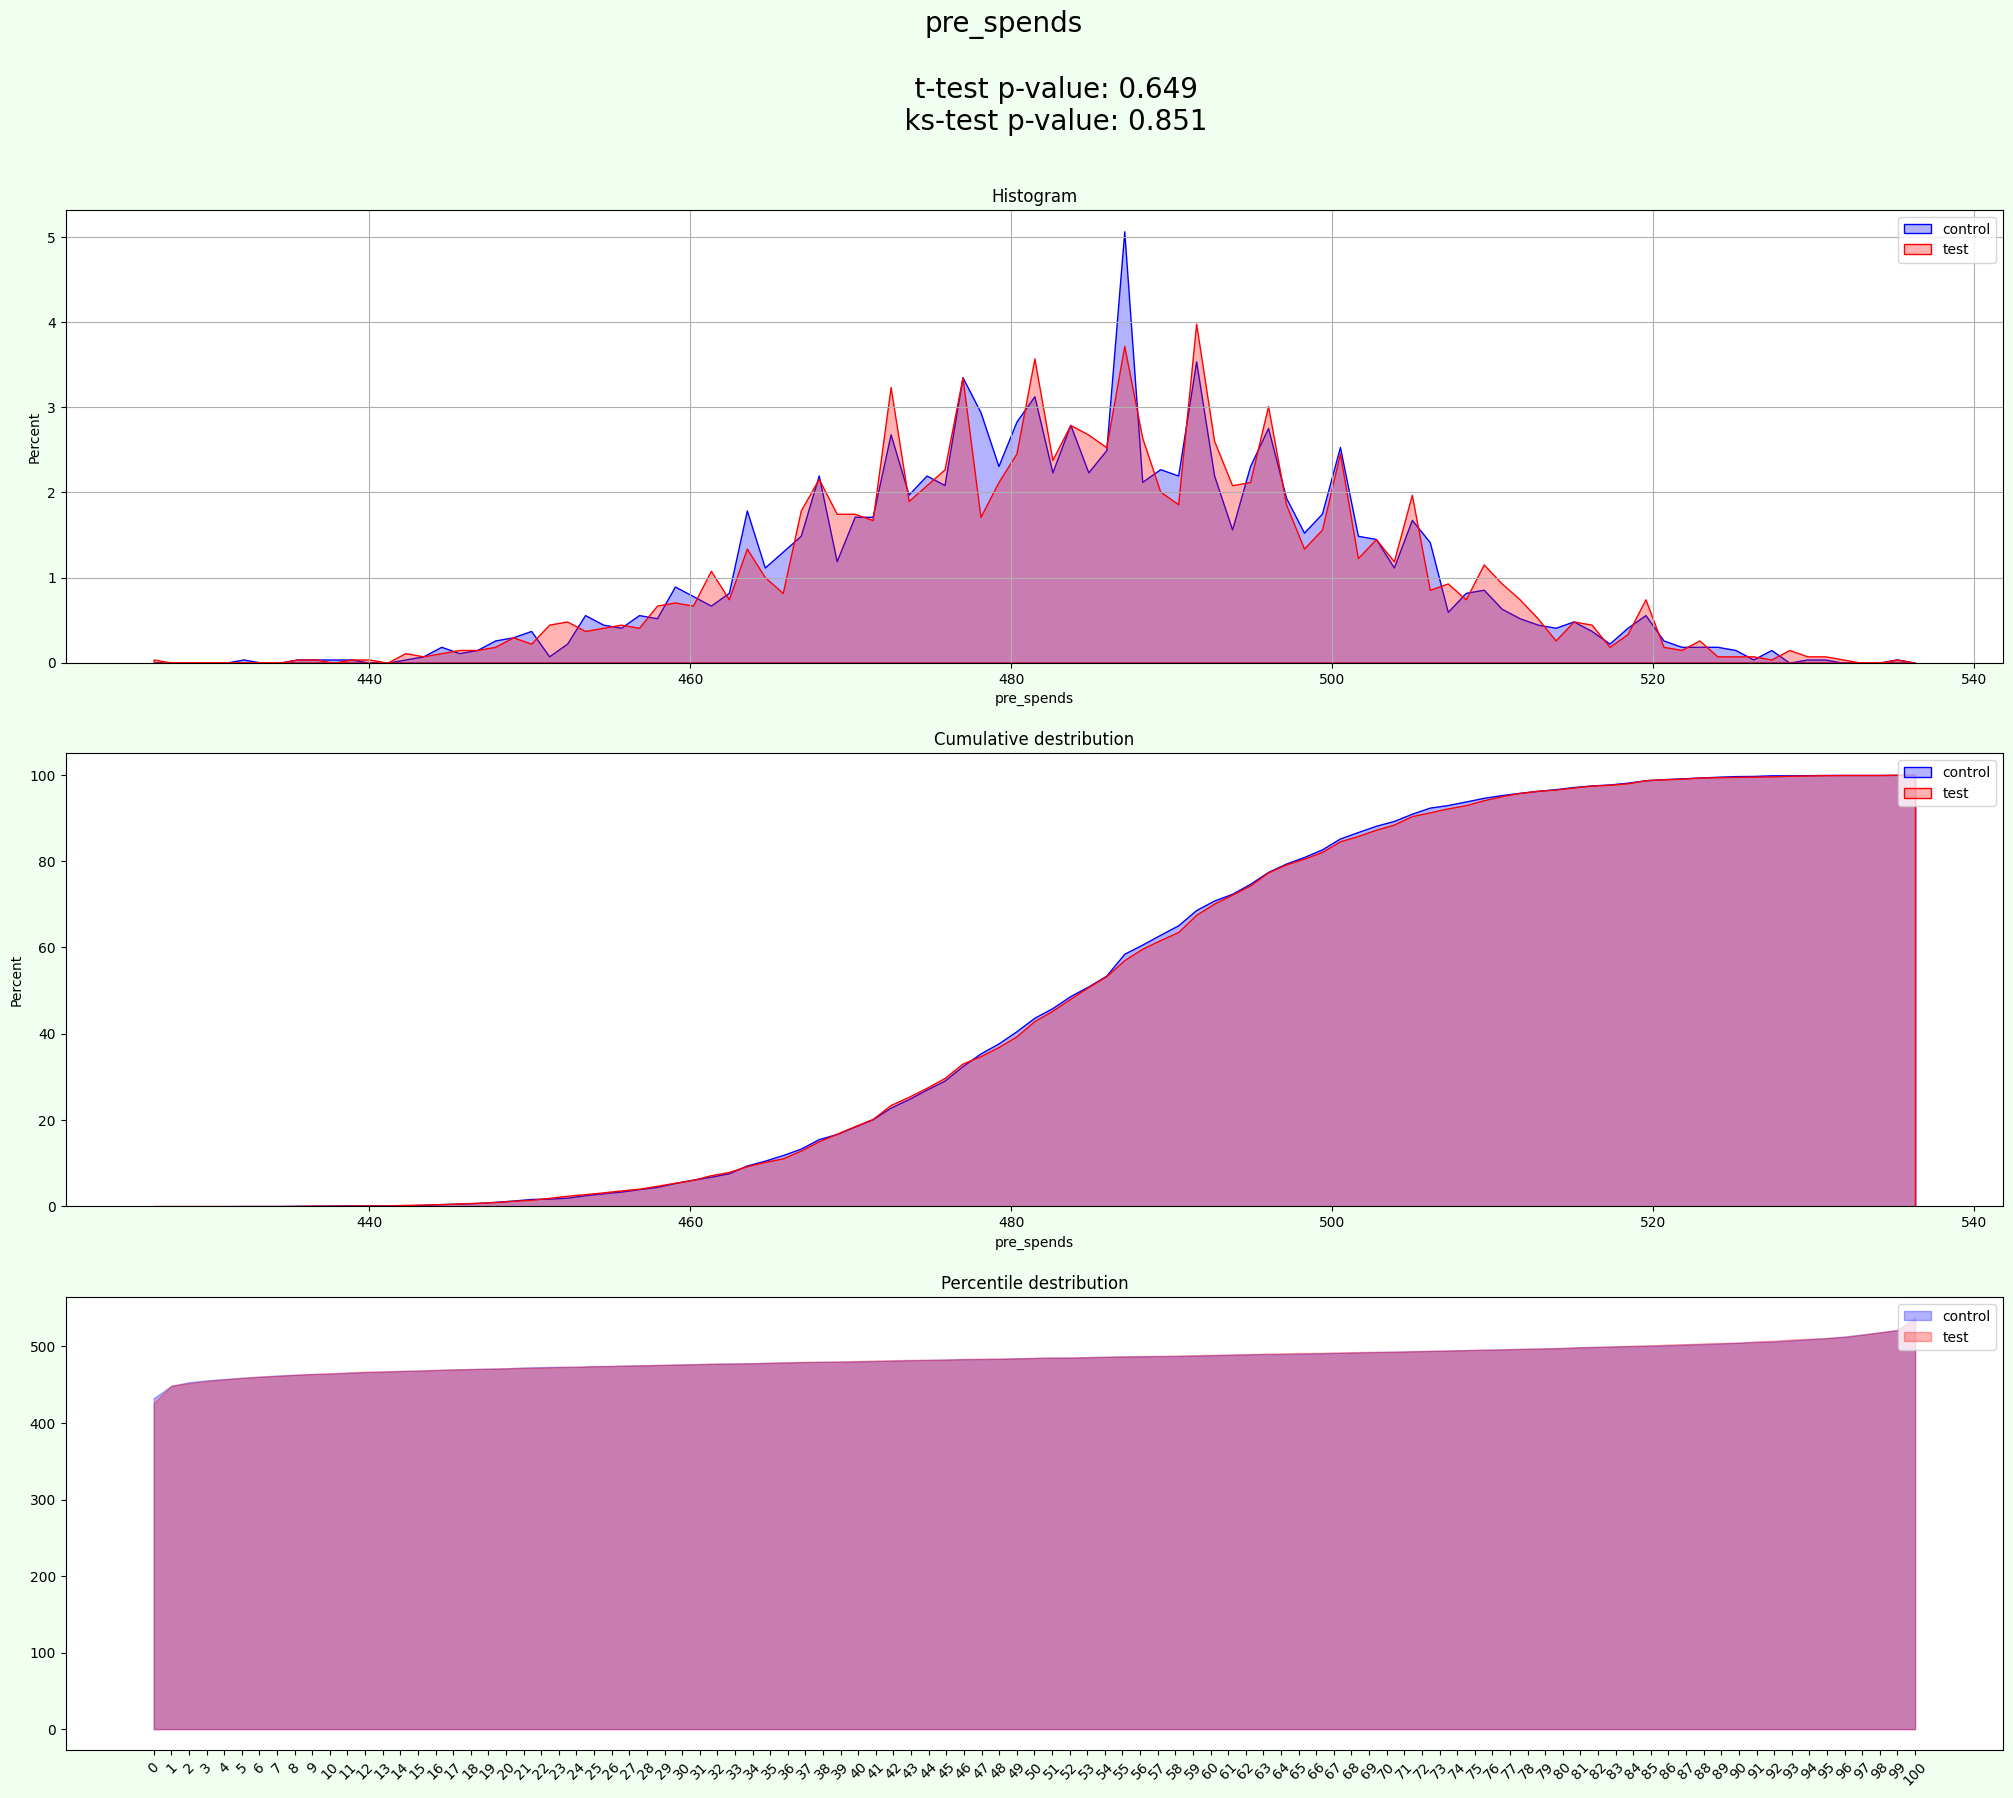

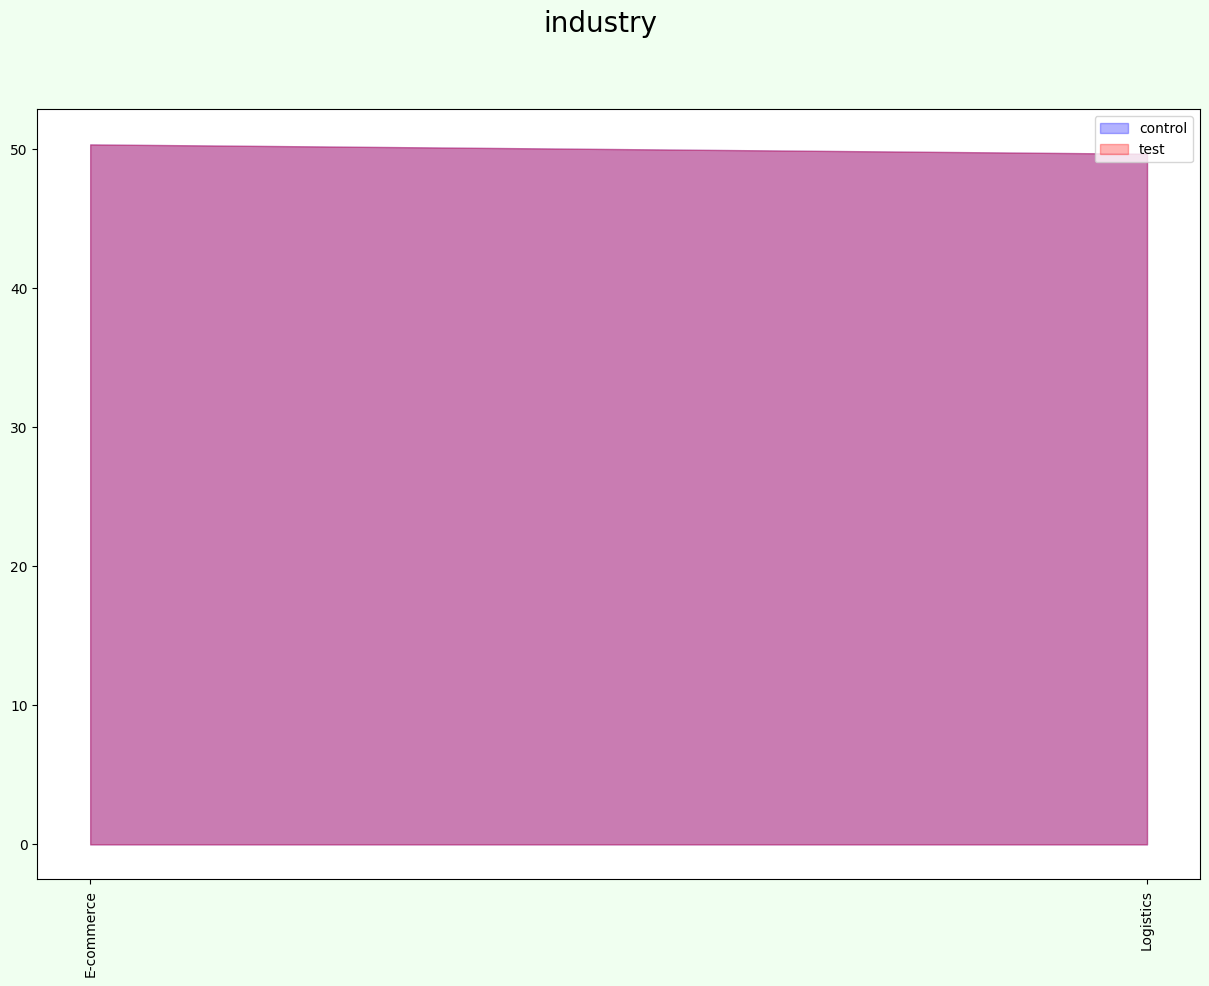

In [34]:
result = experiment.process(data=data, iterations=20)

In [35]:
result['split']['industry'].value_counts(normalize=True) * 100

industry
E-commerce   50.34
Logistics    49.66
Name: proportion, dtype: float64

In [38]:
result.keys()

dict_keys(['experiments', 'aa_score', 'split', 'best_experiment_stat', 'split_stat', 'resume'])

In [44]:
show_result(result)

experiments


,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
0,0,427.44,428.88,1.44,0.34,0.06,0.47,False,False,484.77,...,False,50.02,49.98,2686,2684,0.27,0.60,0.00,0.00,0.49
1,1,427.72,428.60,0.88,0.21,0.25,0.89,False,False,485.00,...,False,50.02,49.98,2686,2684,0.49,0.86,0.00,0.00,0.73
2,2,427.48,428.85,1.37,0.32,0.08,0.39,False,False,484.54,...,False,50.02,49.98,2686,2684,0.08,0.31,0.00,0.00,0.23
3,3,428.08,428.25,0.17,0.04,0.82,0.92,False,False,485.02,...,False,50.02,49.98,2686,2684,0.74,0.88,0.00,0.00,0.84
4,4,428.02,428.30,0.28,0.07,0.72,0.94,False,False,484.84,...,False,50.02,49.98,2686,2684,0.71,0.84,0.00,0.00,0.79
5,5,428.08,428.24,0.16,0.04,0.84,0.88,False,False,484.57,...,True,50.02,49.98,2686,2684,0.47,0.45,0.00,50.00,0.46
6,6,427.98,428.34,0.36,0.08,0.64,0.09,False,False,484.68,...,False,50.02,49.98,2686,2684,0.45,0.25,0.00,0.00,0.32
7,7,427.35,428.98,1.63,0.38,0.04,0.28,True,False,484.99,...,False,50.02,49.98,2686,2684,0.39,0.26,50.00,0.00,0.30
8,8,428.55,427.78,-0.77,-0.18,0.32,0.09,False,False,484.90,...,False,50.02,49.98,2686,2684,0.61,0.32,0.00,0.00,0.42
9,9,427.87,428.46,0.59,0.14,0.45,0.28,False,False,485.10,...,False,50.02,49.98,2686,2684,0.43,0.59,0.00,0.00,0.54



aa_score


,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.05,0.05,1.00,1.00
pre_spends,0.00,0.05,0.00,1.00
mean,0.03,0.05,0.50,1.00



split


,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,0,0,0,488.00,414.44,NaN,M,E-commerce,test
1,3,0,0,501.50,424.33,31.00,NaN,Logistics,test
2,10,0,0,522.50,416.22,64.00,M,E-commerce,test
3,12,0,0,472.00,423.78,43.00,M,E-commerce,test
4,14,0,0,497.00,421.78,26.00,M,Logistics,test
...,...,...,...,...,...,...,...,...,...
5365,9987,0,0,467.00,431.56,48.00,M,Logistics,control
5366,9988,0,0,501.50,423.22,55.00,F,Logistics,control
5367,9990,0,0,490.00,426.00,18.00,M,E-commerce,control
5368,9991,0,0,482.50,421.89,23.00,F,E-commerce,control



best_experiment_stat


,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.08,428.25,0.17,0.04,0.82,0.92,False,False
pre_spends,485.02,484.83,-0.20,-0.04,0.65,0.85,False,False



split_stat


control %              50.02
test %                 49.98
control size            2686
test size               2684
t-test mean p-value     0.74
ks-test mean p-value    0.88
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.84
Name: 3, dtype: object


resume


,aa test passed,split is uniform
post_spends,OK,OK
pre_spends,OK,OK


### 2.4 AA with optimaize group

In [45]:
experiment.columns_labeling(data)

{'target_field': ['treat', 'pre_spends', 'post_spends', 'age'],
 'group_col': ['gender', 'industry']}

Group optimization:   0%|          | 0/3 [00:00<?, ?it/s]

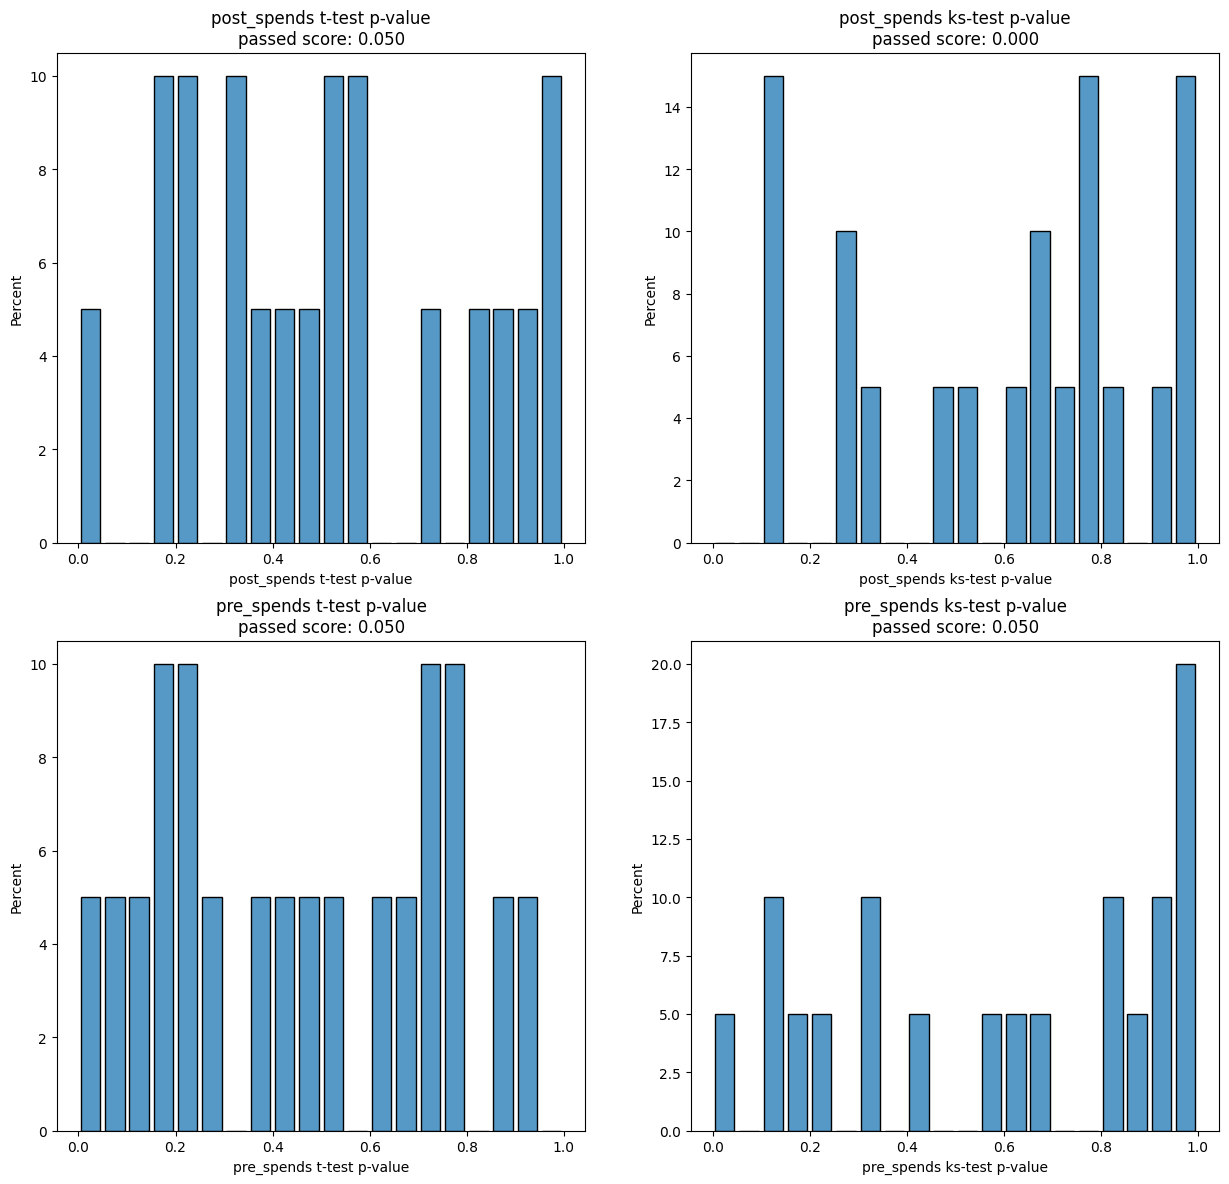

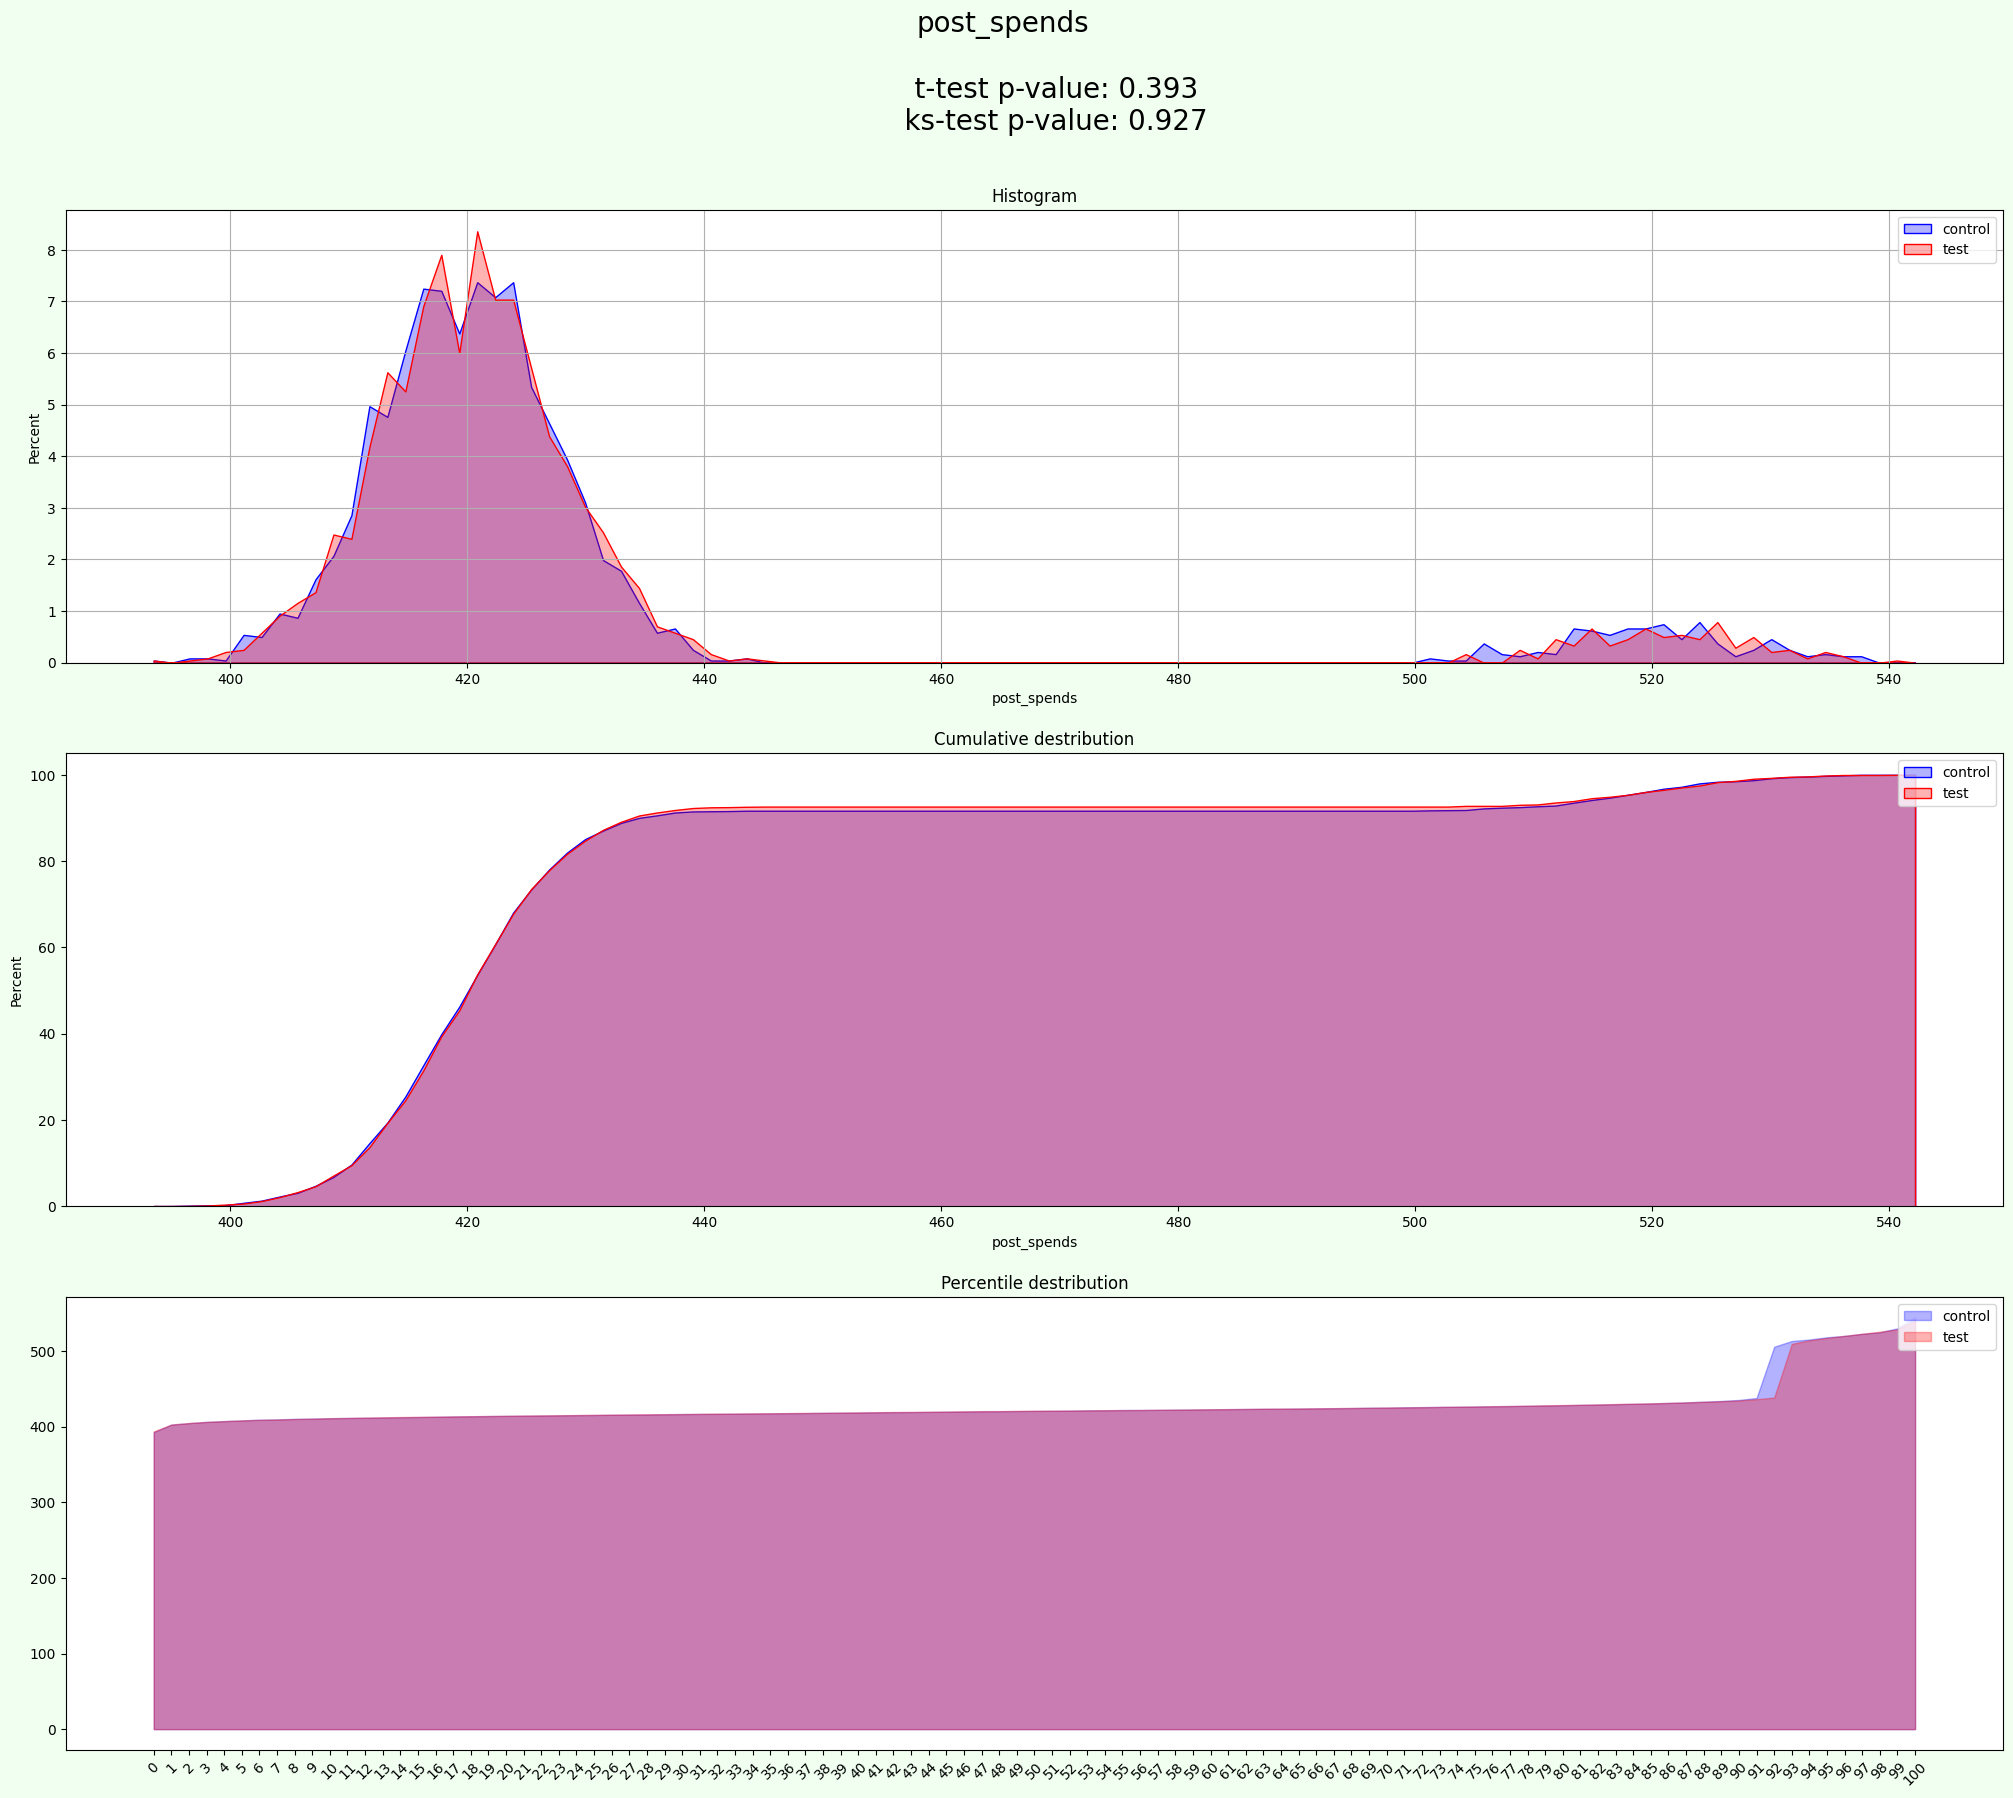

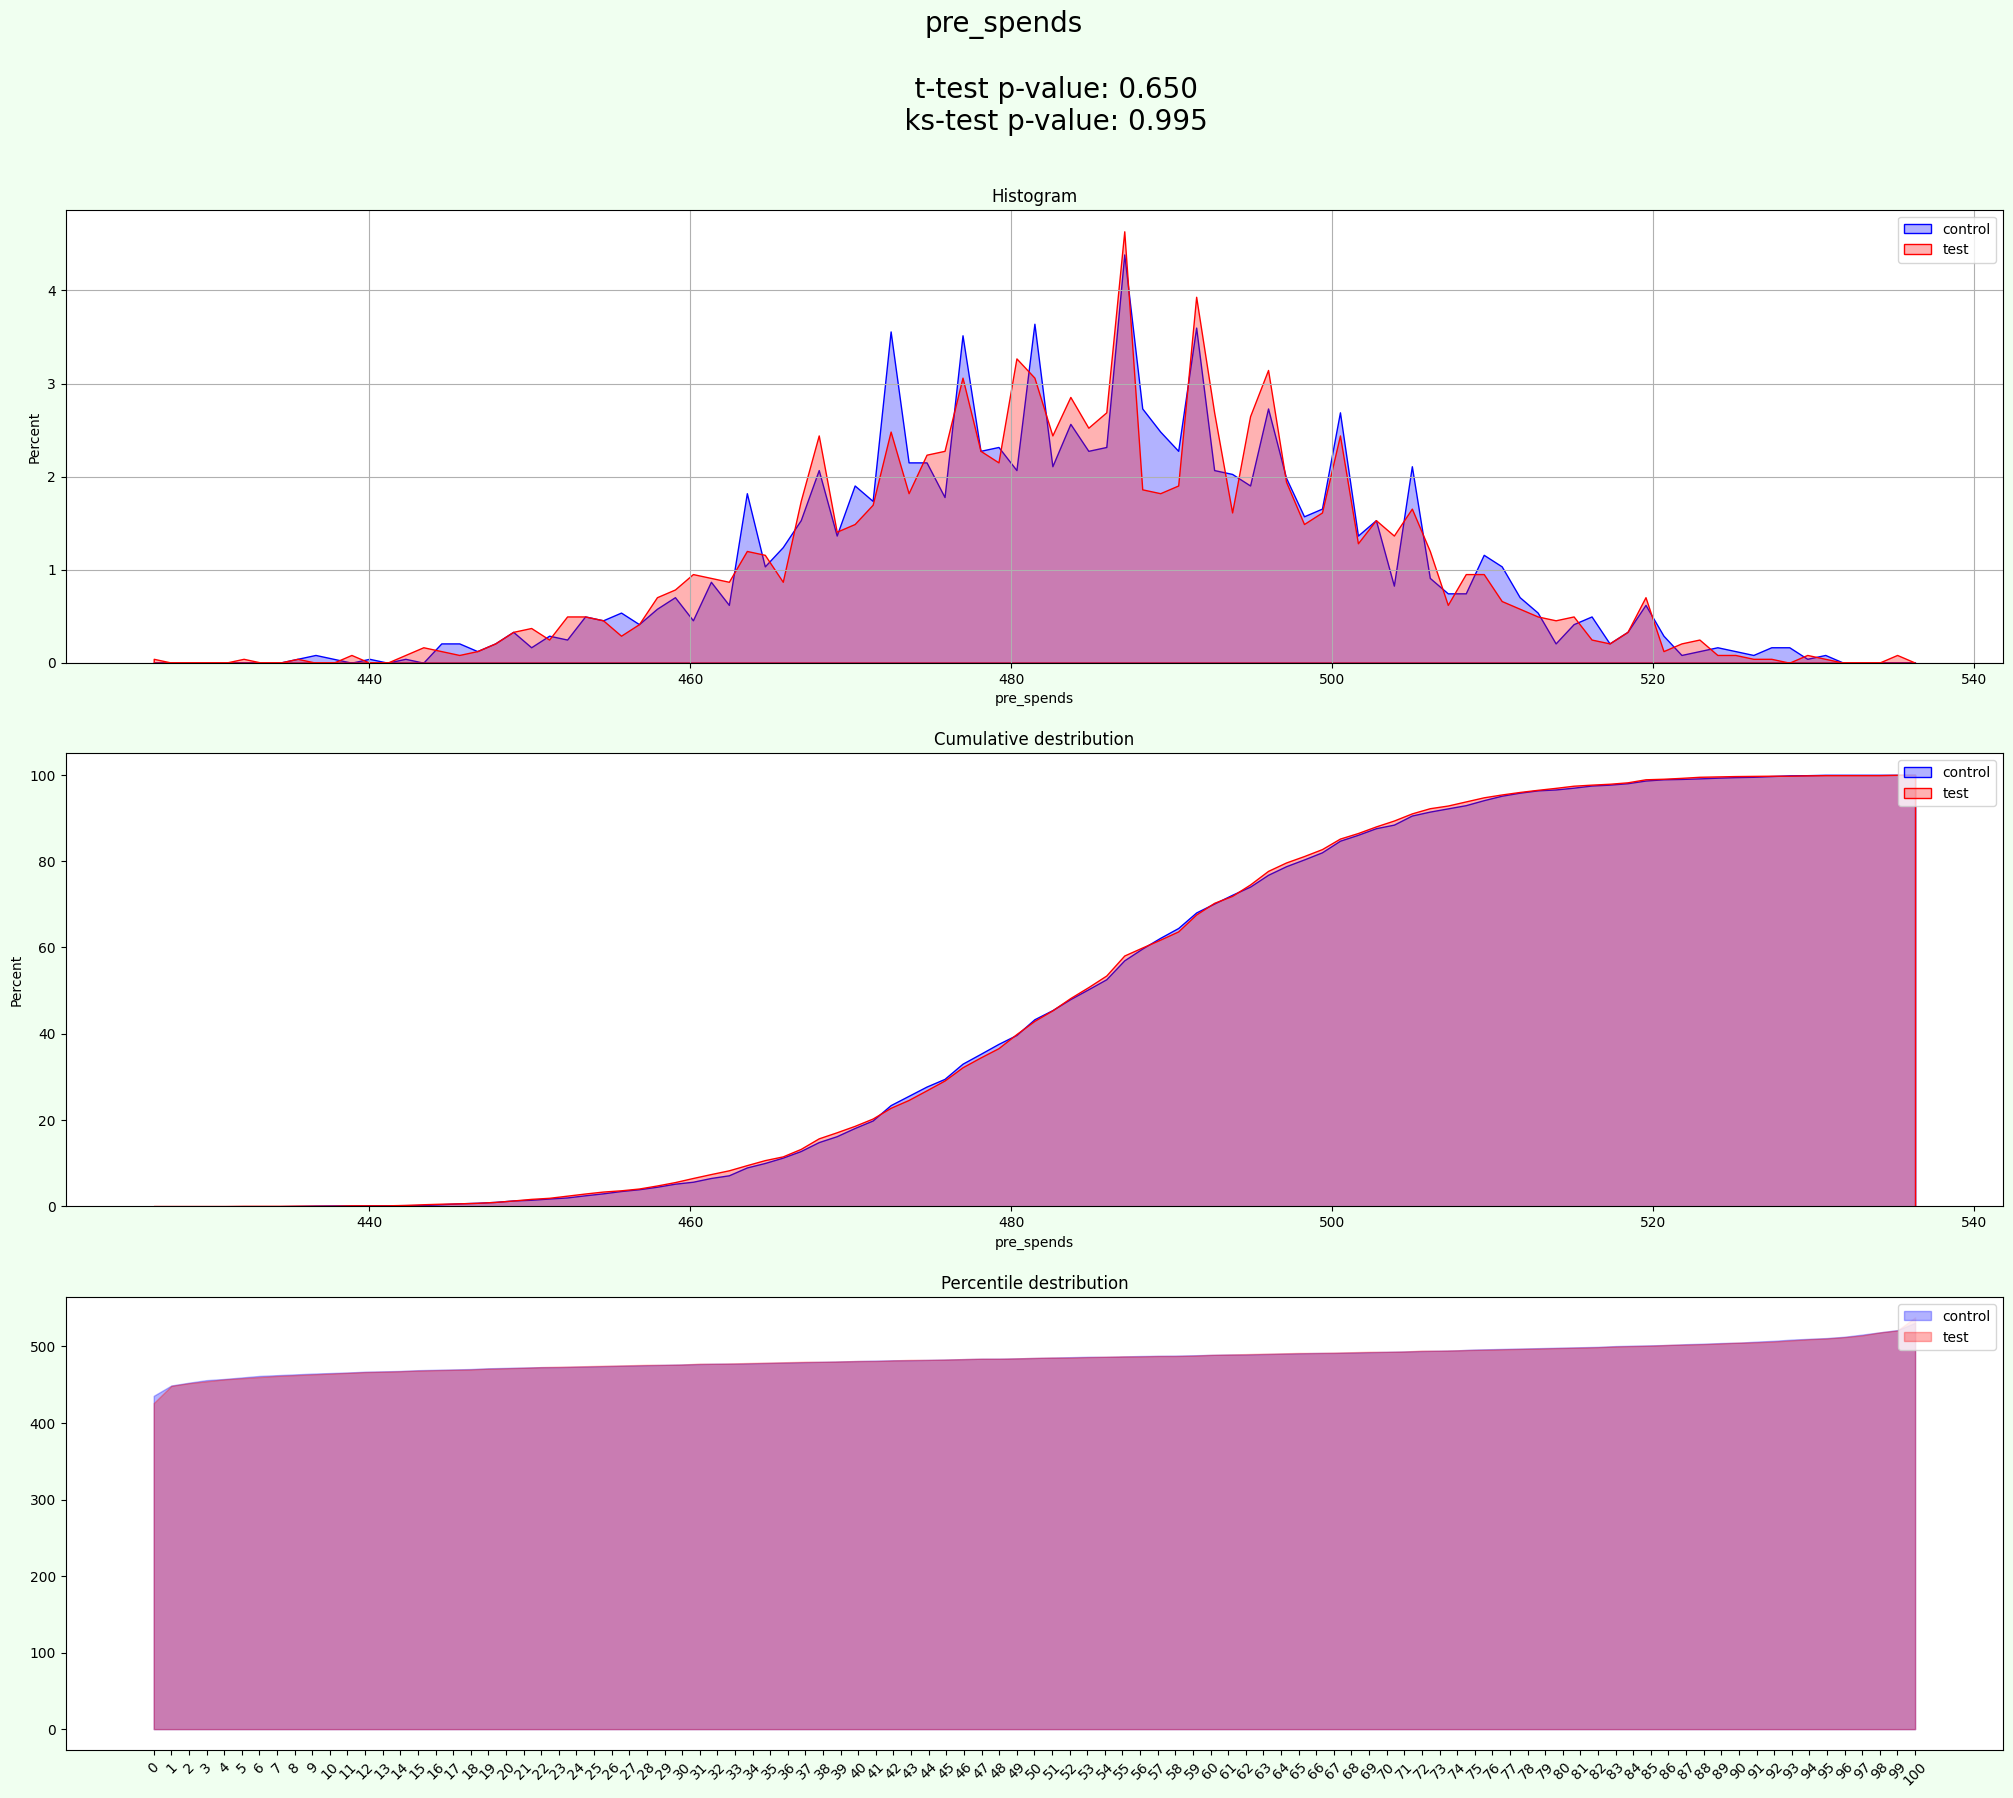

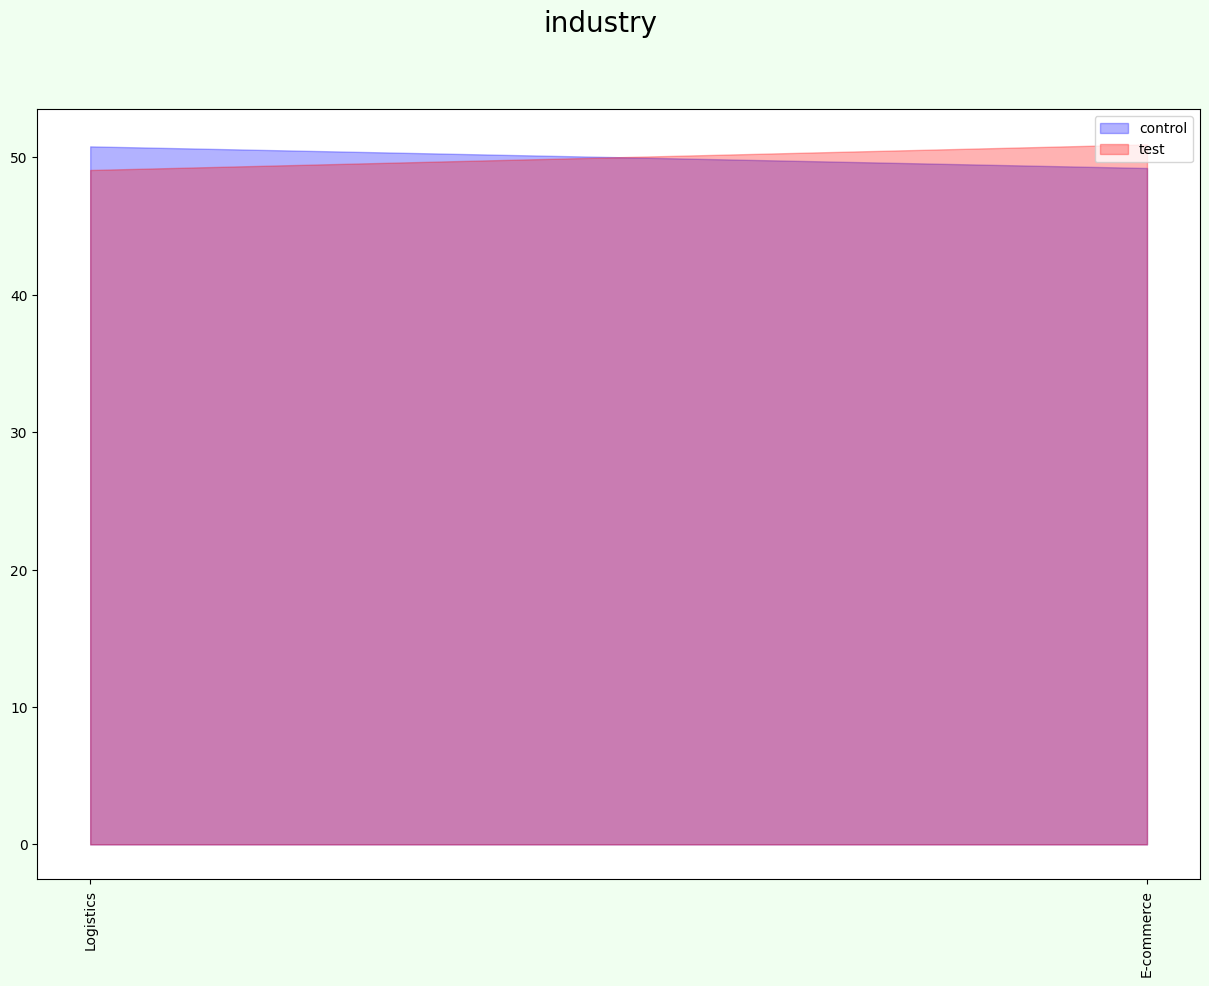

In [60]:
result = experiment.process(data=data, optimize_groups=True, iterations=20)

In [47]:
experiment.group_cols

['industry']

In [48]:
show_result(result)

experiments


,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
0,0,428.48,427.85,-0.63,-0.15,0.42,0.86,False,False,485.22,...,False,50.00,50.00,2685,2685,0.29,0.77,0.00,0.00,0.61
1,1,428.65,427.67,-0.98,-0.23,0.21,0.54,False,False,485.04,...,False,50.00,50.00,2685,2685,0.40,0.73,0.00,0.00,0.62
2,2,427.94,428.38,0.44,0.10,0.57,0.96,False,False,485.09,...,False,50.00,50.00,2685,2685,0.51,0.91,0.00,0.00,0.78
3,3,428.47,427.86,-0.61,-0.14,0.43,0.67,False,False,484.93,...,False,50.00,50.00,2685,2685,0.71,0.83,0.00,0.00,0.79
4,4,428.18,428.14,-0.05,-0.01,0.95,1.00,False,False,485.01,...,False,50.00,50.00,2685,2685,0.83,0.97,0.00,0.00,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,428.82,427.51,-1.31,-0.31,0.09,0.51,False,False,484.83,...,False,50.00,50.00,2685,2685,0.38,0.52,0.00,0.00,0.48
1996,1996,428.62,427.71,-0.91,-0.21,0.24,0.22,False,False,484.81,...,False,50.00,50.00,2685,2685,0.41,0.36,0.00,0.00,0.38
1997,1997,428.13,428.19,0.06,0.01,0.94,0.56,False,False,484.87,...,False,50.00,50.00,2685,2685,0.88,0.32,0.00,0.00,0.51
1998,1998,428.33,428.00,-0.33,-0.08,0.67,0.09,False,False,485.05,...,False,50.00,50.00,2685,2685,0.61,0.25,0.00,0.00,0.37



aa_score


,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.05,0.03,1.00,0.00
pre_spends,0.05,0.04,1.00,0.00
mean,0.05,0.04,1.00,0.00



split


,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,3,0,0,501.50,424.33,31.00,NaN,Logistics,test
1,10,0,0,522.50,416.22,64.00,M,E-commerce,test
2,14,0,0,497.00,421.78,26.00,M,Logistics,test
3,21,0,0,489.00,433.11,30.00,M,E-commerce,test
4,25,0,0,499.50,425.78,56.00,M,Logistics,test
...,...,...,...,...,...,...,...,...,...
5365,9986,0,0,494.00,432.11,54.00,NaN,Logistics,control
5366,9988,0,0,501.50,423.22,55.00,F,Logistics,control
5367,9990,0,0,490.00,426.00,18.00,M,E-commerce,control
5368,9992,0,0,491.50,424.00,44.00,M,E-commerce,control



best_experiment_stat


,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.17,428.16,-0.01,-0.00,0.99,0.99,False,False
pre_spends,484.91,484.94,0.03,0.01,0.94,0.97,False,False



split_stat


control %              50.00
test %                 50.00
control size            2685
test size               2685
t-test mean p-value     0.96
ks-test mean p-value    0.98
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.97
Name: 1109, dtype: object


resume


,aa test passed,split is uniform
post_spends,OK,OK
pre_spends,OK,OK


### 2.5 AA test with quantization

In [50]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

group_cols = 'industry'
quant_field = 'gender'

In [51]:
experiment = AATest(info_cols=info_cols, target_fields=target, group_cols=group_cols, quant_field=quant_field)

  0%|          | 0/20 [00:00<?, ?it/s]

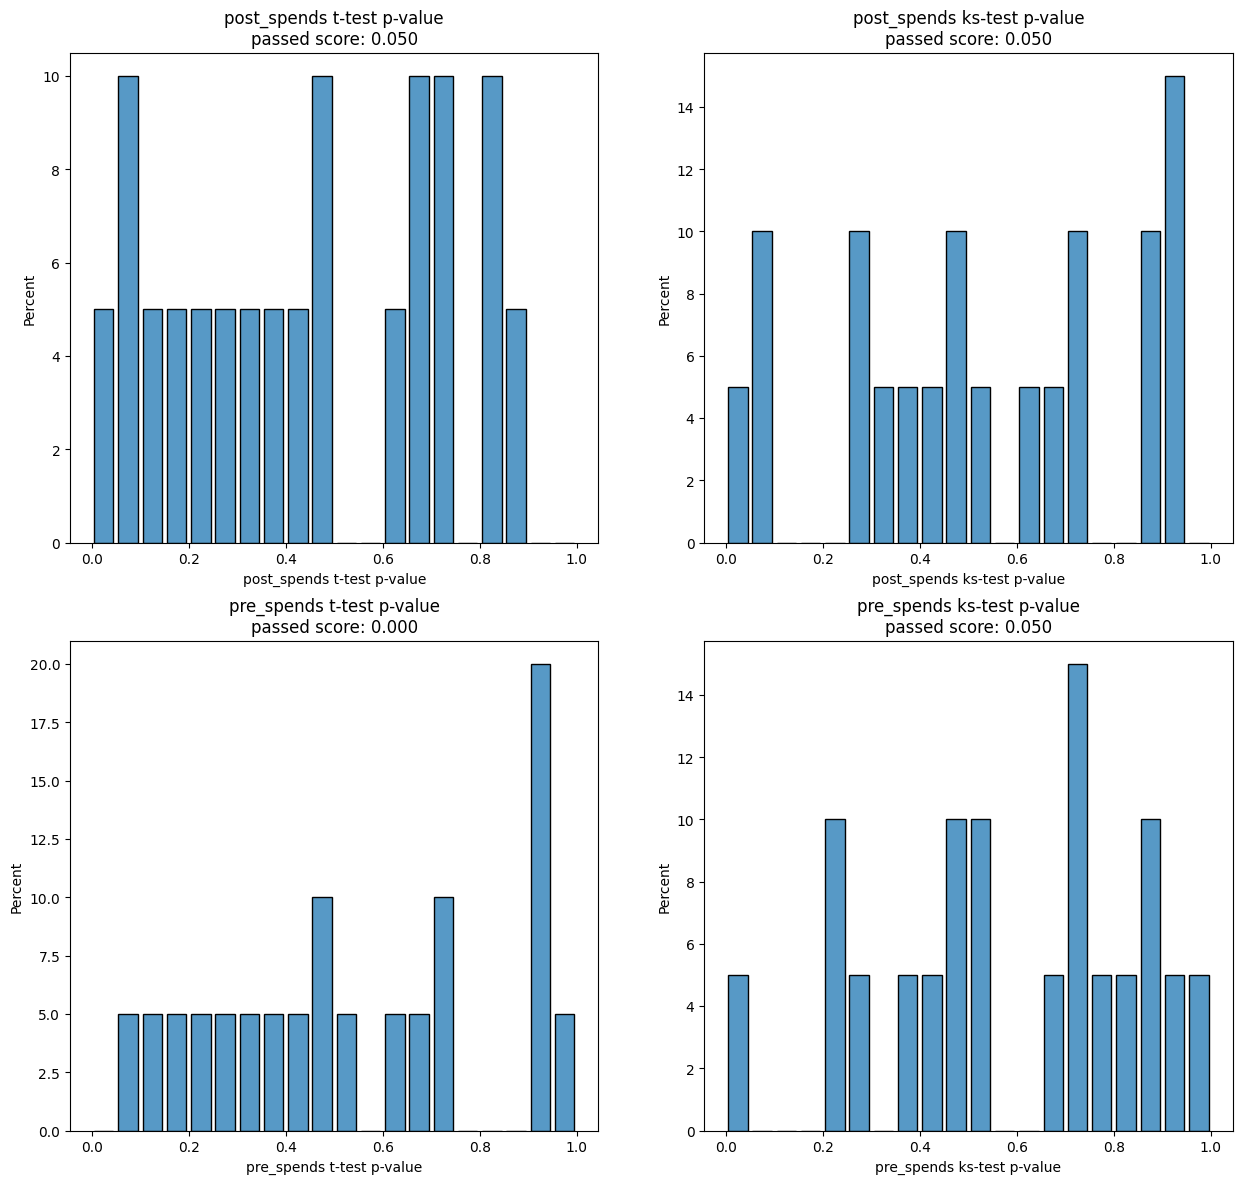

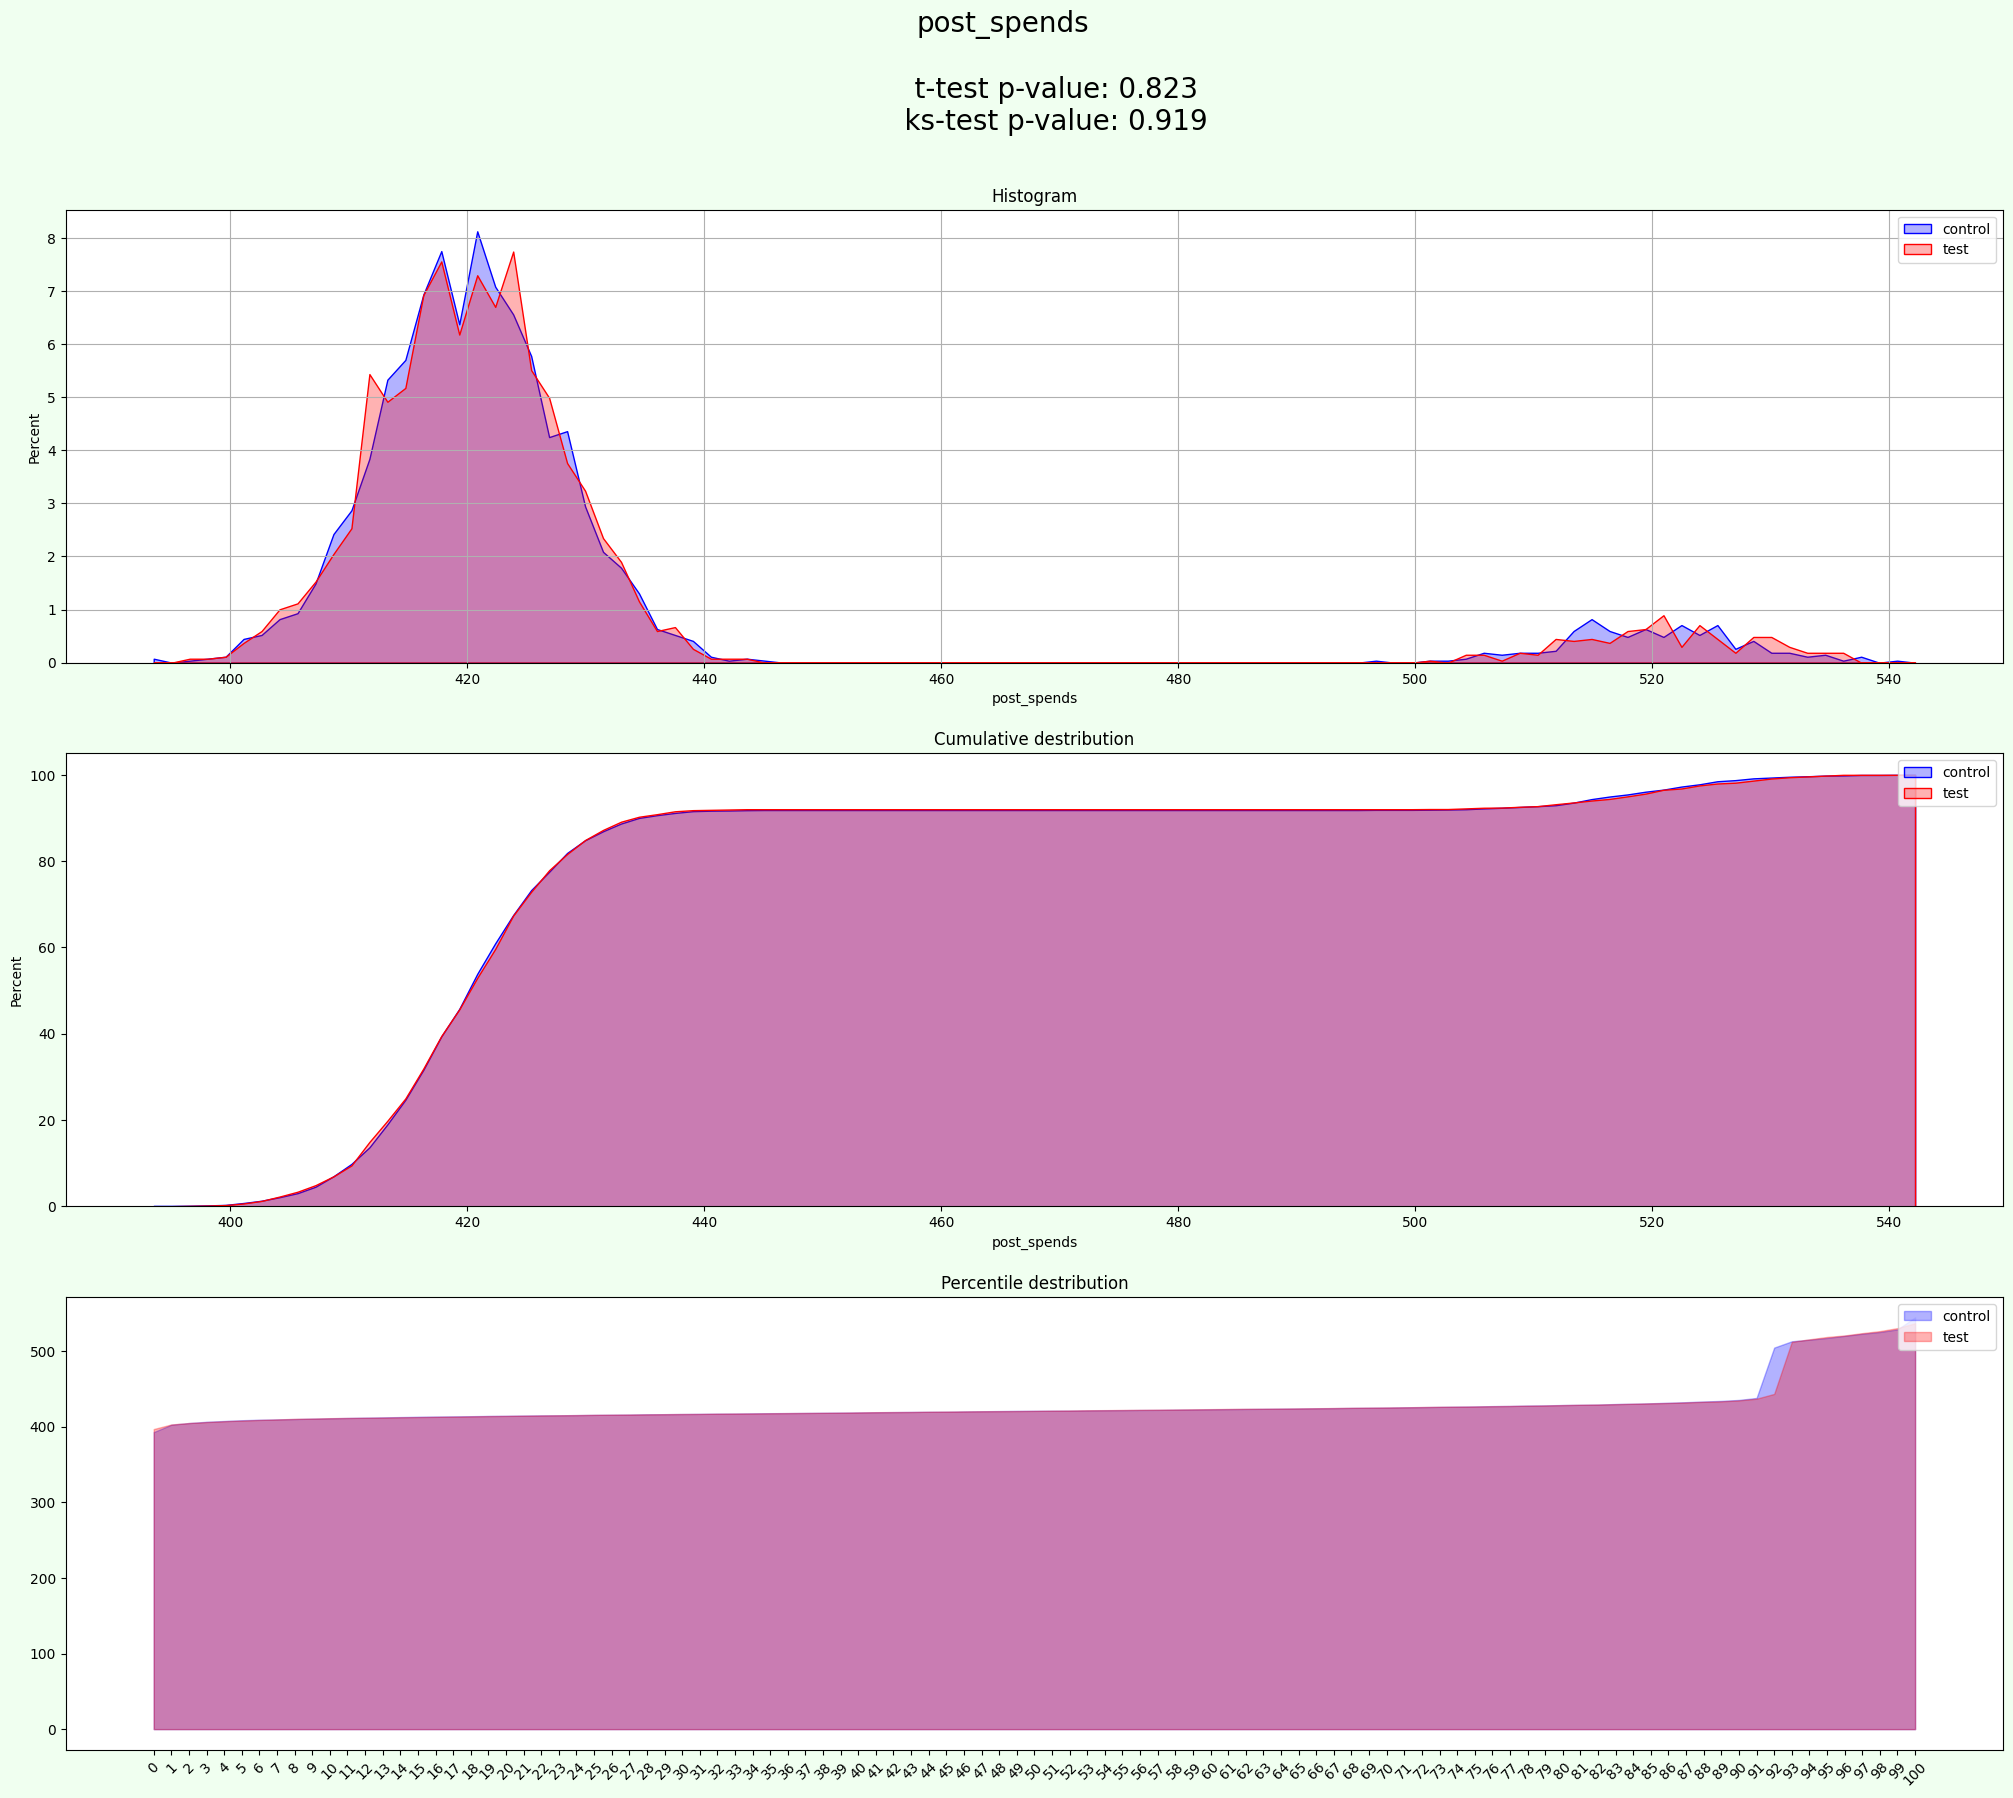

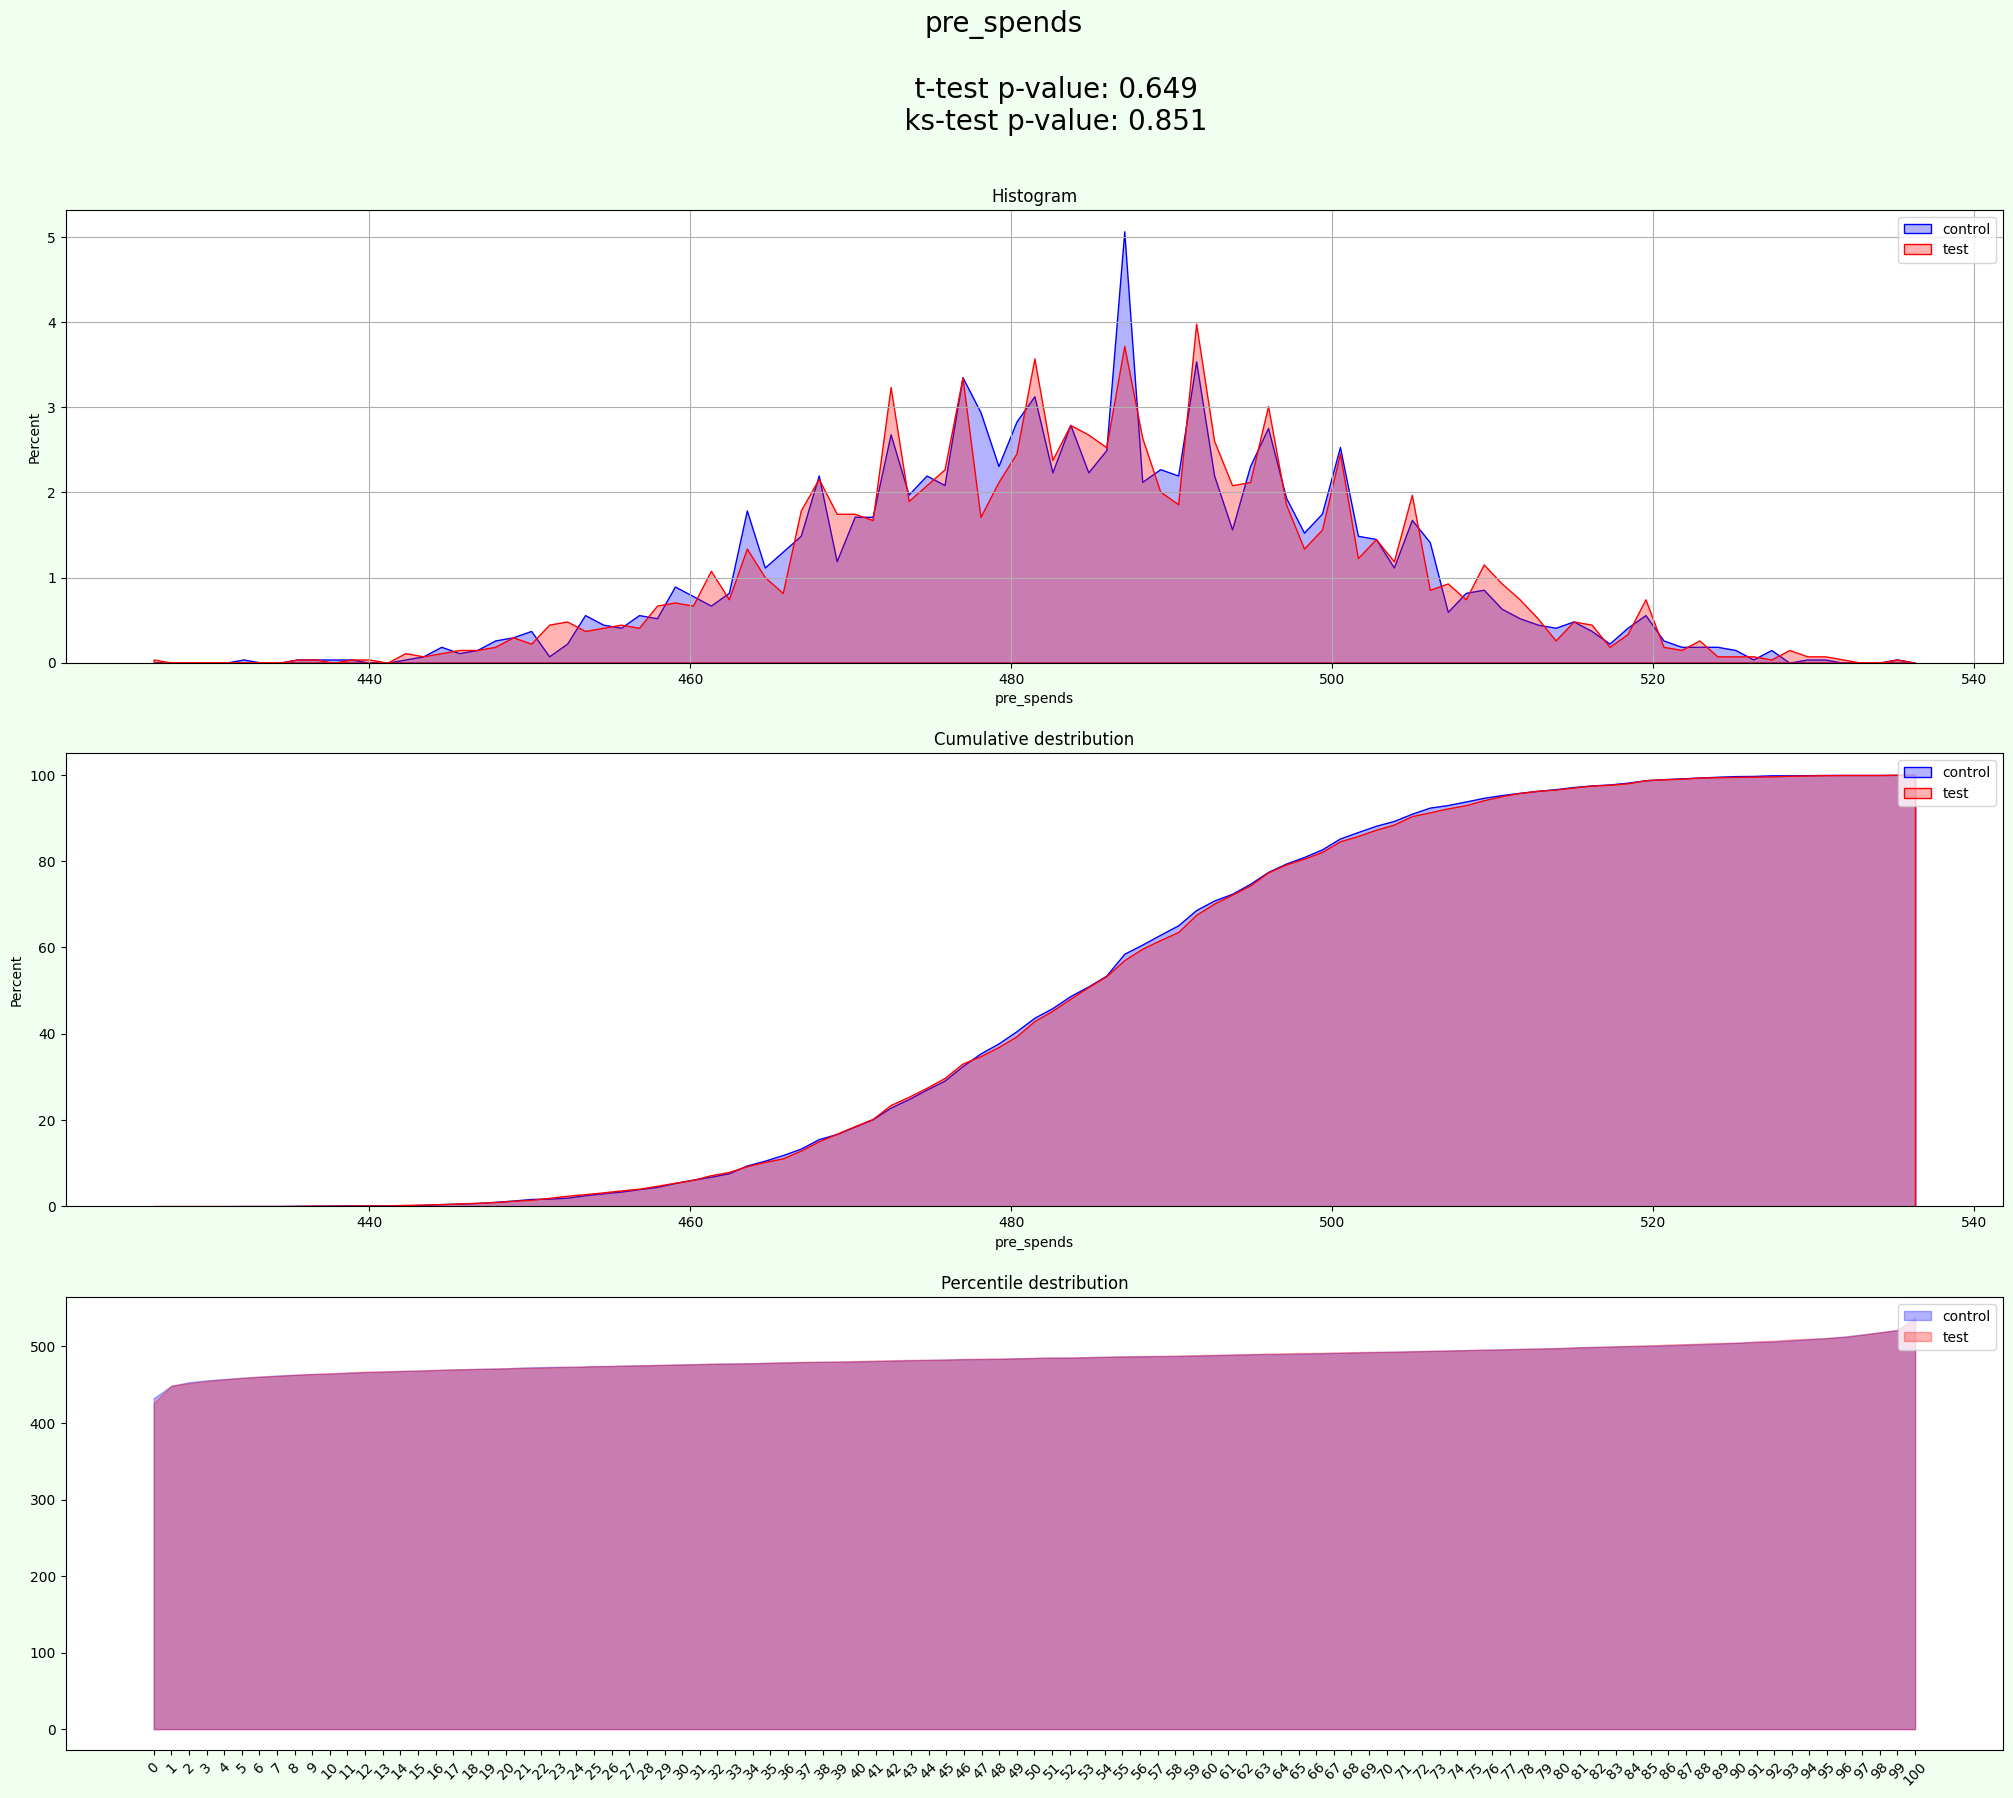

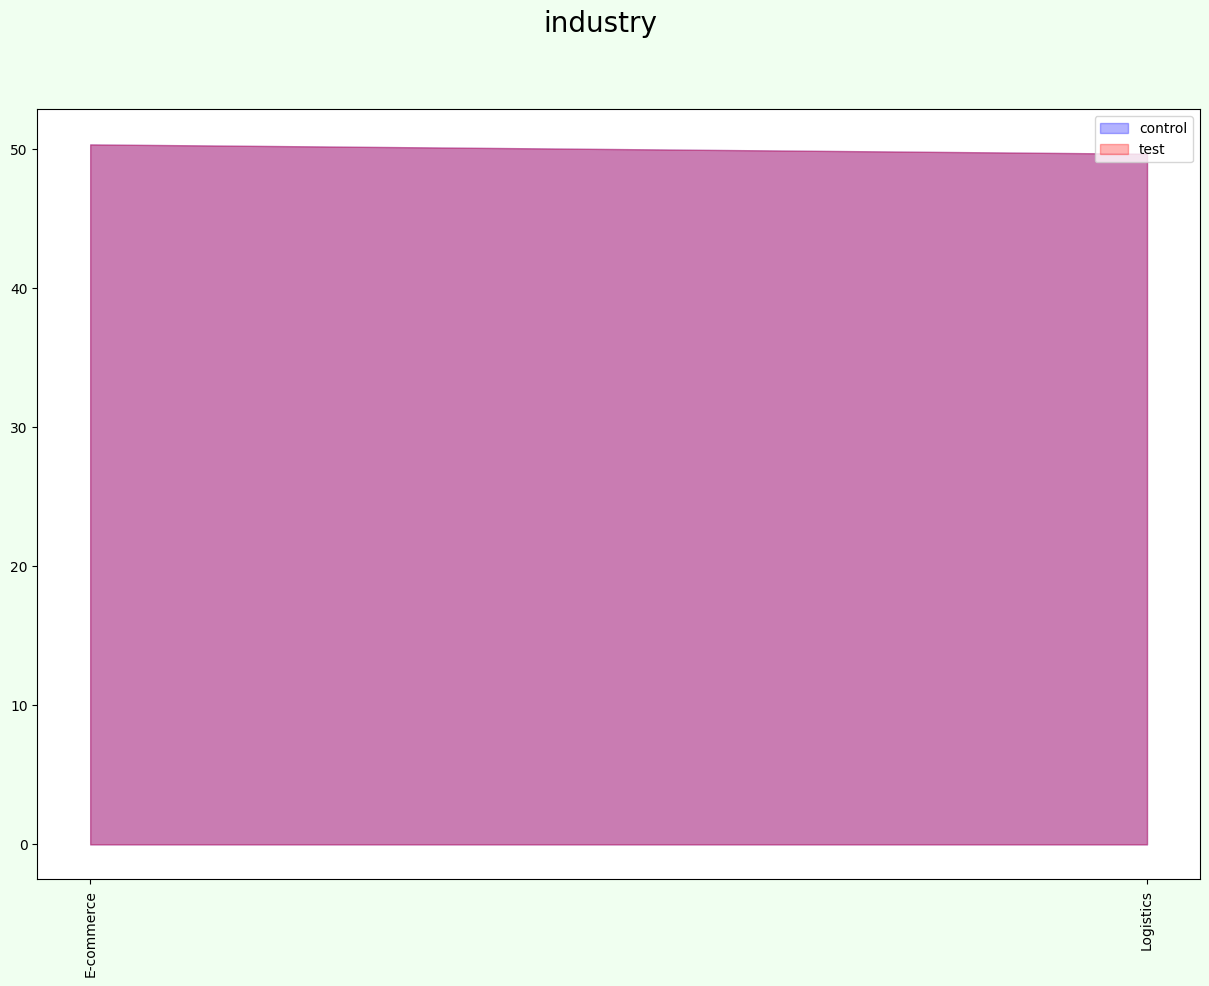

In [61]:
result = experiment.process(data=data, iterations=20)

In [55]:
result['split'].groupby(['gender', 'industry', 'group'])['user_id'].count()

gender  industry    group  
F       E-commerce  test       1255
        Logistics   test       1222
M       E-commerce  control    1165
        Logistics   control    1191
Name: user_id, dtype: int64

In [56]:
show_result(result)

experiments


,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
0,0,428.38,427.91,-0.47,-0.11,0.54,0.27,False,False,484.93,...,False,53.87,46.13,2893,2477,0.76,0.50,0.00,0.00,0.59
1,1,428.31,427.97,-0.35,-0.08,0.66,0.44,False,False,484.87,...,False,56.13,43.87,3014,2356,0.72,0.57,0.00,0.00,0.62
2,2,428.38,427.91,-0.47,-0.11,0.54,0.27,False,False,484.93,...,False,53.87,46.13,2893,2477,0.76,0.50,0.00,0.00,0.59
3,3,427.94,430.20,2.26,0.53,0.08,0.13,False,False,484.95,...,False,90.00,10.00,4833,537,0.38,0.36,0.00,0.00,0.37
4,4,427.94,430.20,2.26,0.53,0.08,0.13,False,False,484.95,...,False,90.00,10.00,4833,537,0.38,0.36,0.00,0.00,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,427.94,430.20,2.26,0.53,0.08,0.13,False,False,484.95,...,False,90.00,10.00,4833,537,0.38,0.36,0.00,0.00,0.37
1996,1996,428.31,427.97,-0.35,-0.08,0.66,0.44,False,False,484.87,...,False,56.13,43.87,3014,2356,0.72,0.57,0.00,0.00,0.62
1997,1997,428.31,427.97,-0.35,-0.08,0.66,0.44,False,False,484.87,...,False,56.13,43.87,3014,2356,0.72,0.57,0.00,0.00,0.62
1998,1998,428.38,427.91,-0.47,-0.11,0.54,0.27,False,False,484.93,...,False,53.87,46.13,2893,2477,0.76,0.50,0.00,0.00,0.59



aa_score


,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.00,0.00,0.00,0.00
pre_spends,0.00,0.00,0.00,0.00
mean,0.00,0.00,0.00,0.00



split


,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,3,0,0,501.50,424.33,31.00,NaN,Logistics,test
1,13,0,0,508.50,424.22,36.00,F,E-commerce,test
2,15,0,0,464.50,421.67,38.00,F,E-commerce,test
3,28,3,1,479.50,527.89,20.00,NaN,E-commerce,test
4,31,0,0,505.00,427.22,54.00,F,Logistics,test
...,...,...,...,...,...,...,...,...,...
5365,9984,0,0,460.00,417.11,66.00,M,Logistics,control
5366,9987,0,0,467.00,431.56,48.00,M,Logistics,control
5367,9990,0,0,490.00,426.00,18.00,M,E-commerce,control
5368,9992,0,0,491.50,424.00,44.00,M,E-commerce,control



best_experiment_stat


,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.31,427.97,-0.35,-0.08,0.66,0.44,False,False
pre_spends,484.87,484.99,0.12,0.02,0.79,0.69,False,False



split_stat


control %              56.13
test %                 43.87
control size            3014
test size               2356
t-test mean p-value     0.72
ks-test mean p-value    0.57
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.62
Name: 1, dtype: object


resume


,aa test passed,split is uniform
post_spends,not OK,OK
pre_spends,not OK,OK


### 2.6 Unbalanced AA test

In [4]:
info_cols = ['user_id', 'signup_month']
target = ['post_spends', 'pre_spends']

group_cols = 'industry'

In [5]:
experiment = AATest(info_cols=info_cols, target_fields=target, group_cols=group_cols)

  0%|          | 0/20 [00:00<?, ?it/s]

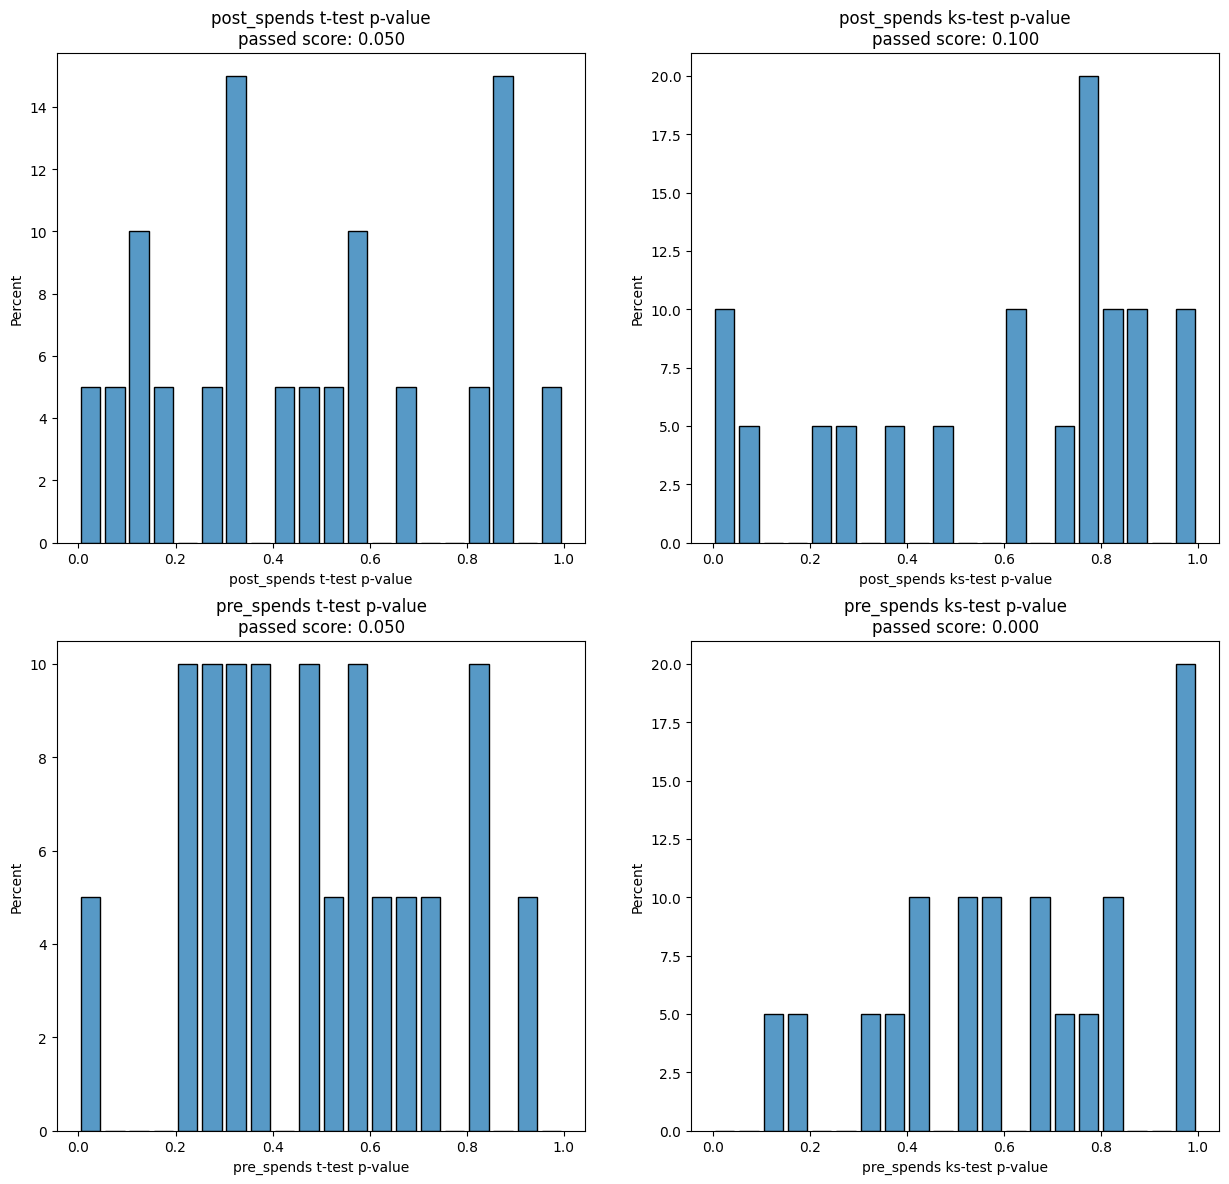

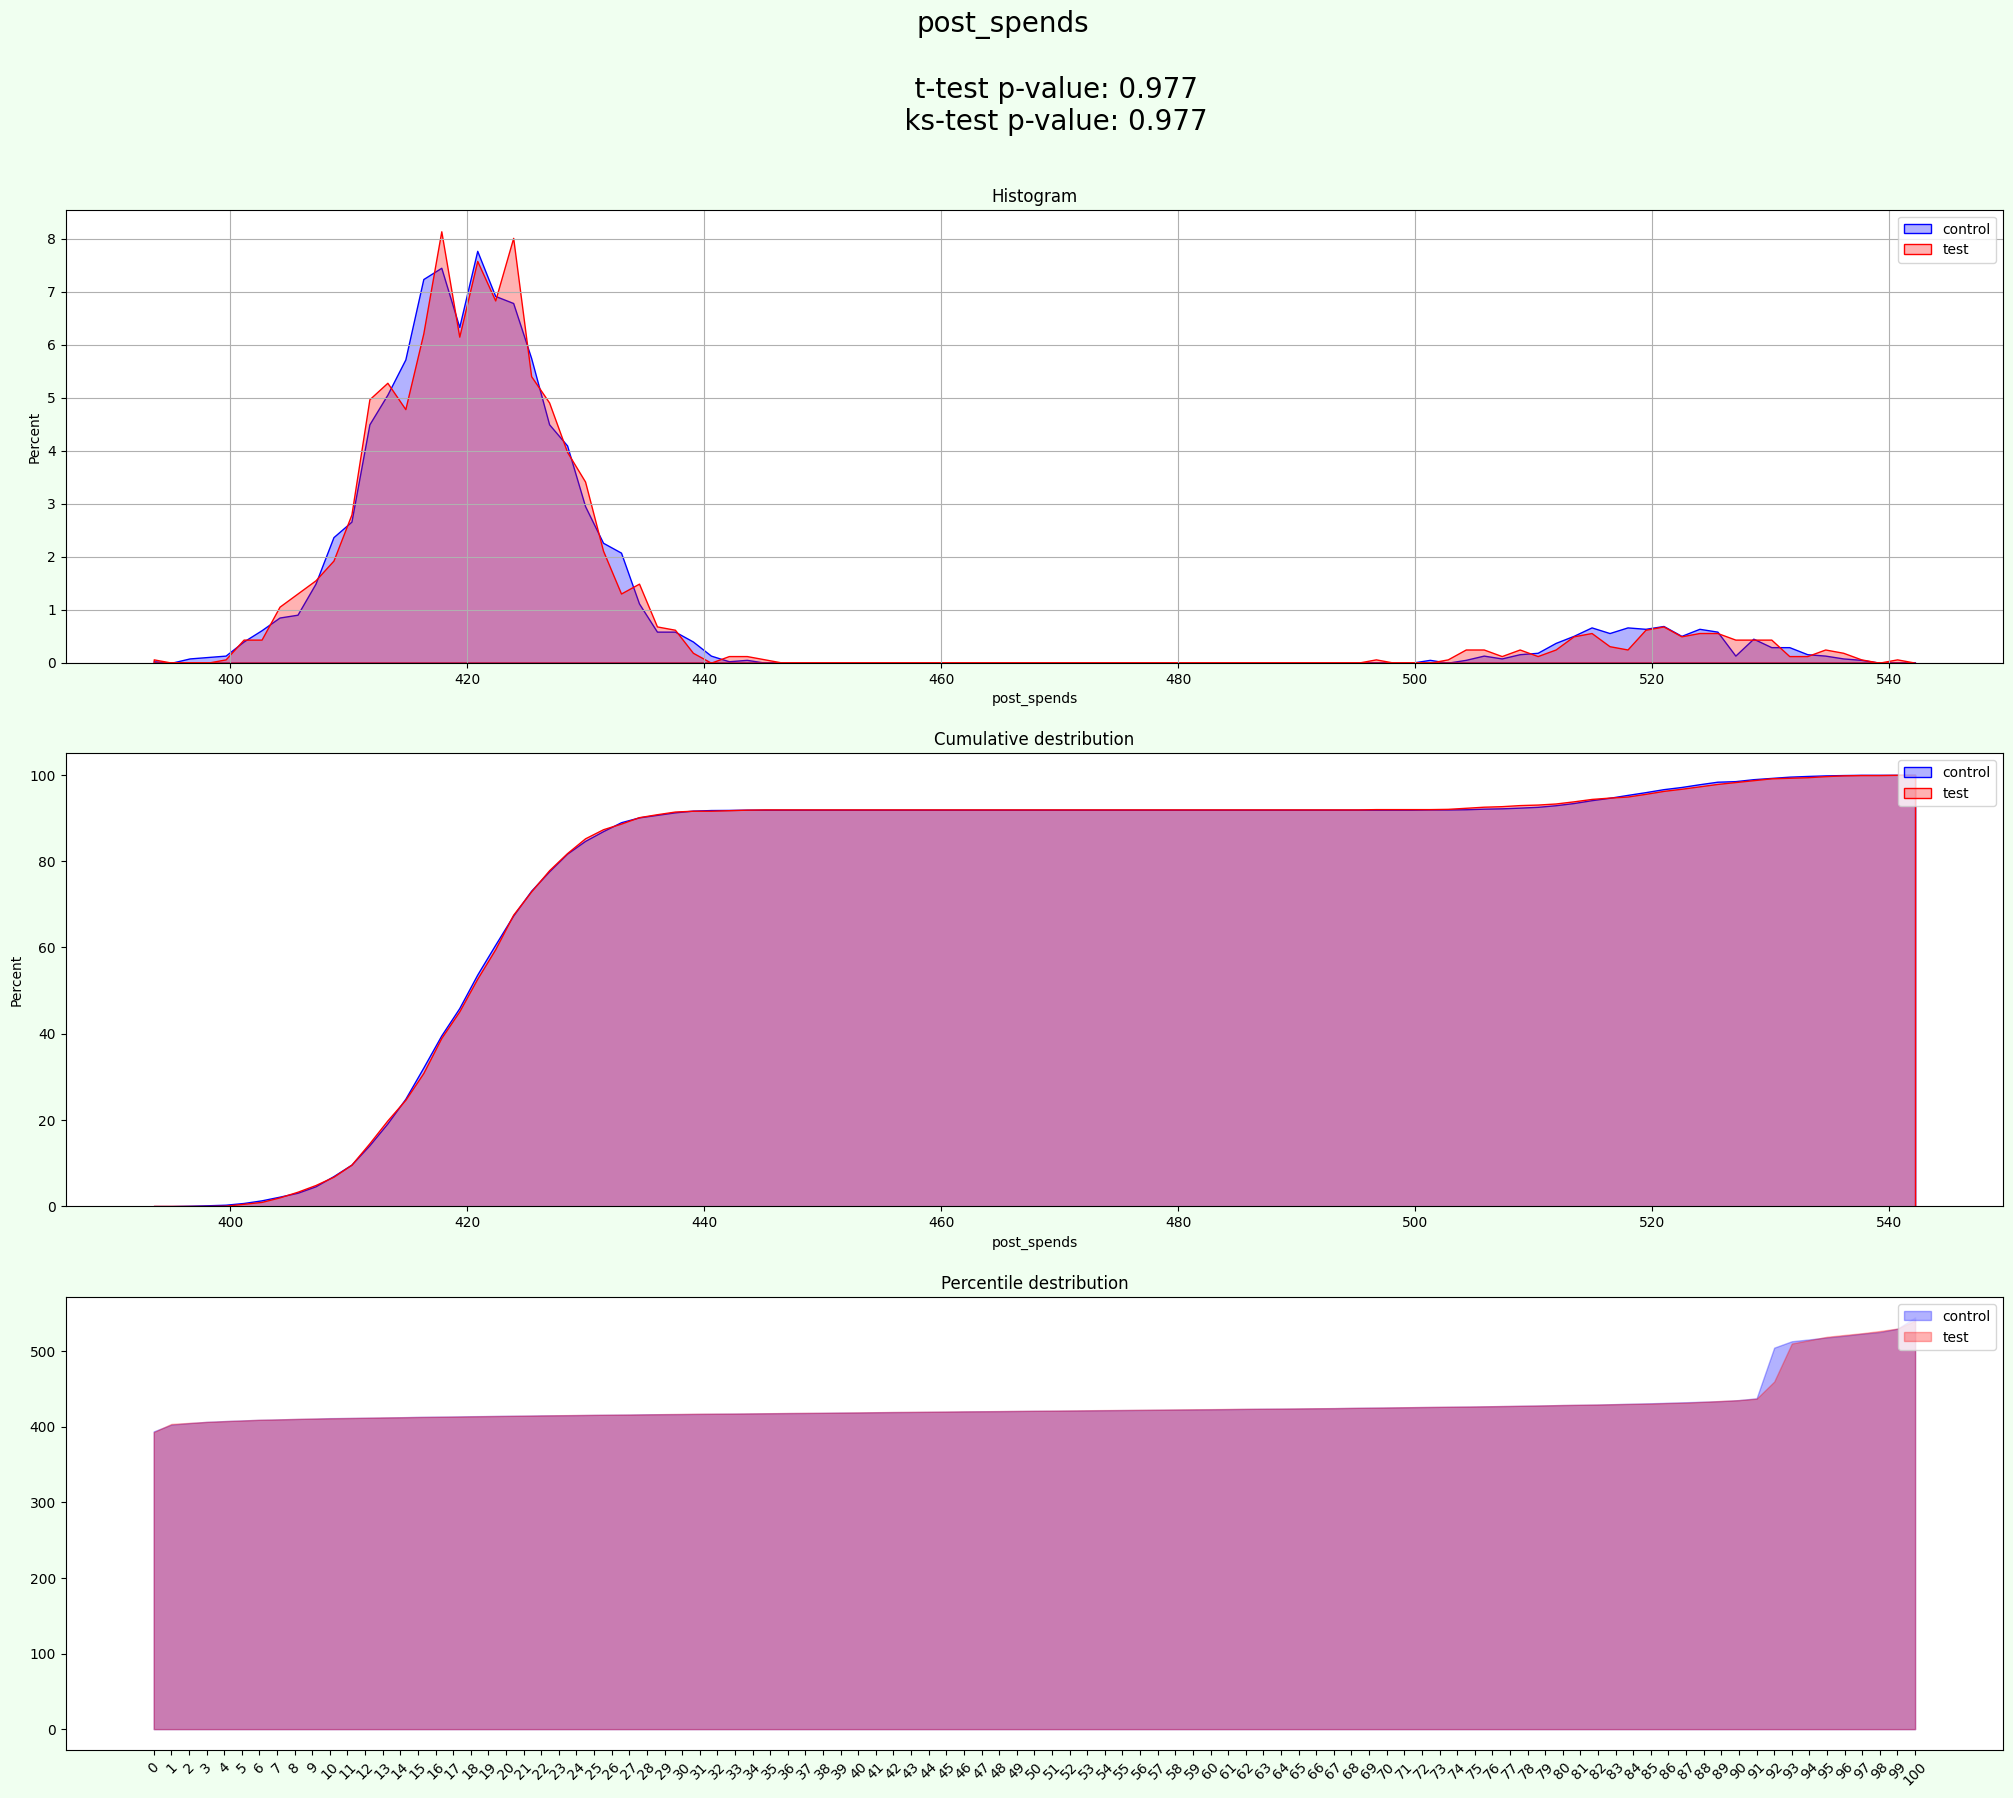

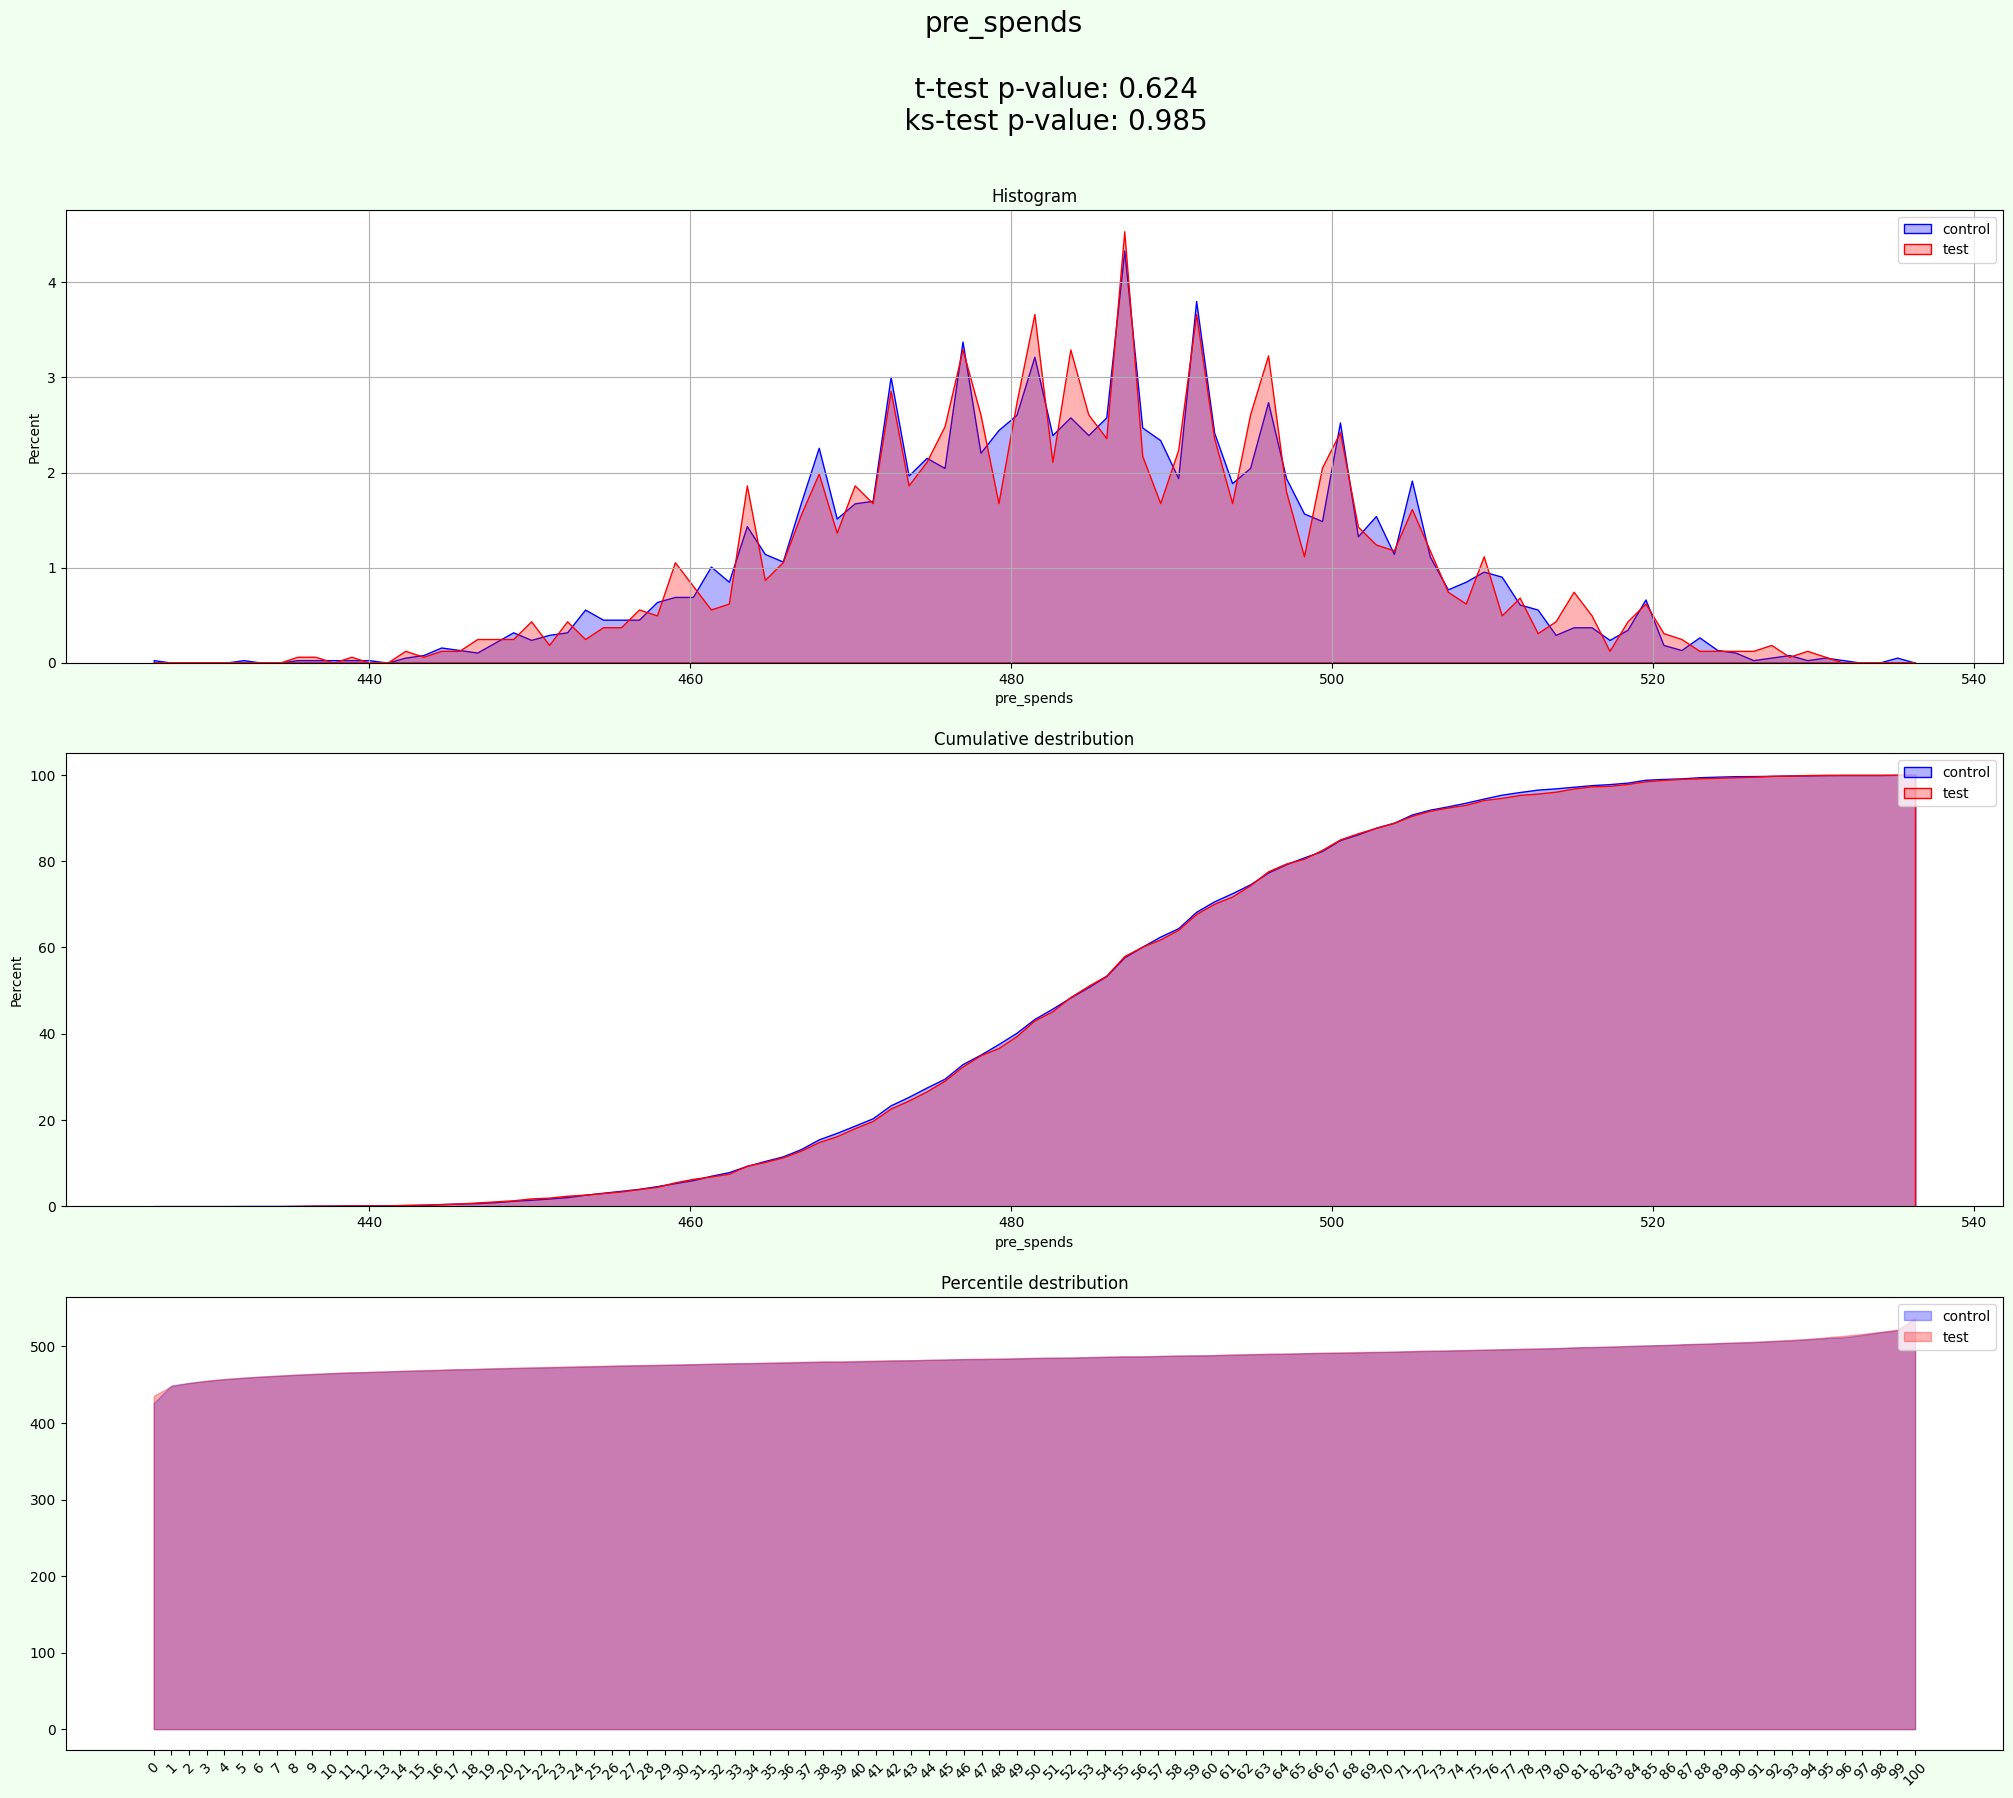

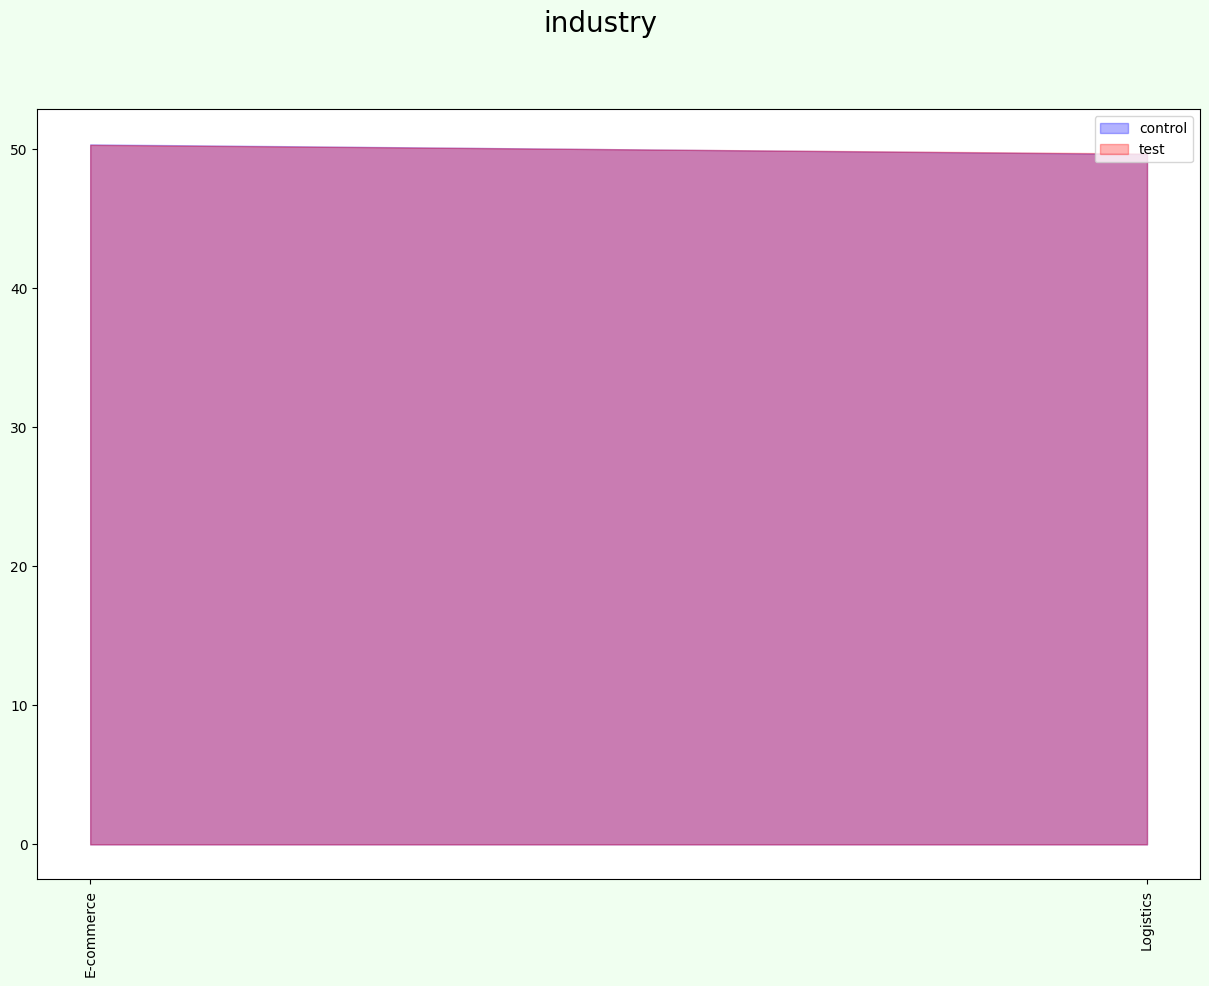

In [9]:
result = experiment.process(data=data, test_size=0.3, iterations=20)

In [10]:
result['split']['group'].value_counts(normalize=True)

group
control   0.70
test      0.30
Name: proportion, dtype: float64

In [11]:
show_result(result)

experiments


,random_state,post_spends a mean,post_spends b mean,post_spends ab delta,post_spends ab delta %,post_spends t-test p-value,post_spends ks-test p-value,post_spends t-test passed,post_spends ks-test passed,pre_spends a mean,...,pre_spends ks-test passed,control %,test %,control size,test size,t-test mean p-value,ks-test mean p-value,t-test passed %,ks-test passed %,mean_tests_score
0,0,427.97,428.61,0.64,0.15,0.45,0.75,False,False,484.83,...,False,70.02,29.98,3760,1610,0.46,0.79,0.00,0.00,0.68
1,1,428.12,428.25,0.12,0.03,0.88,0.83,False,False,485.07,...,False,70.02,29.98,3760,1610,0.60,0.90,0.00,0.00,0.80
2,2,428.17,428.15,-0.02,-0.01,0.98,0.98,False,False,484.86,...,False,70.02,29.98,3760,1610,0.80,0.98,0.00,0.00,0.92
3,3,428.10,428.30,0.20,0.05,0.81,1.00,False,False,484.99,...,False,70.02,29.98,3760,1610,0.73,0.84,0.00,0.00,0.80
4,4,427.82,428.95,1.13,0.26,0.18,0.65,False,False,484.96,...,False,70.02,29.98,3760,1610,0.50,0.81,0.00,0.00,0.71
5,5,428.41,427.59,-0.82,-0.19,0.33,0.77,False,False,484.96,...,False,70.02,29.98,3760,1610,0.57,0.80,0.00,0.00,0.72
6,6,427.92,428.72,0.80,0.19,0.35,0.03,False,True,484.76,...,False,70.02,29.98,3760,1610,0.29,0.18,0.00,50.00,0.22
7,7,428.30,427.83,-0.47,-0.11,0.58,0.46,False,False,484.93,...,False,70.02,29.98,3760,1610,0.76,0.57,0.00,0.00,0.63
8,8,428.60,427.14,-1.46,-0.34,0.08,0.02,False,True,485.03,...,False,70.02,29.98,3760,1610,0.28,0.23,0.00,50.00,0.24
9,9,428.45,427.50,-0.95,-0.22,0.26,0.37,False,False,485.07,...,False,70.02,29.98,3760,1610,0.28,0.47,0.00,0.00,0.40



aa_score


,t-test passed score,ks-test passed score,t-test aa passed,ks-test aa passed
post_spends,0.05,0.10,1.00,0.00
pre_spends,0.05,0.00,1.00,0.00
mean,0.05,0.05,1.00,0.00



split


,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,group
0,13,0,0,508.50,424.22,36.00,F,E-commerce,test
1,15,0,0,464.50,421.67,38.00,F,E-commerce,test
2,25,0,0,499.50,425.78,56.00,M,Logistics,test
3,27,0,0,468.50,432.22,NaN,M,E-commerce,test
4,31,0,0,505.00,427.22,54.00,F,Logistics,test
...,...,...,...,...,...,...,...,...,...
5365,9987,0,0,467.00,431.56,48.00,M,Logistics,control
5366,9988,0,0,501.50,423.22,55.00,F,Logistics,control
5367,9990,0,0,490.00,426.00,18.00,M,E-commerce,control
5368,9991,0,0,482.50,421.89,23.00,F,E-commerce,control



best_experiment_stat


,a mean,b mean,ab delta,ab delta %,t-test p-value,ks-test p-value,t-test passed,ks-test passed
post_spends,428.17,428.15,-0.02,-0.01,0.98,0.98,False,False
pre_spends,484.86,485.09,0.23,0.05,0.62,0.99,False,False



split_stat


control %              70.02
test %                 29.98
control size            3760
test size               1610
t-test mean p-value     0.80
ks-test mean p-value    0.98
t-test passed %         0.00
ks-test passed %        0.00
mean_tests_score        0.92
Name: 2, dtype: object


resume


,aa test passed,split is uniform
post_spends,OK,OK
pre_spends,OK,OK
